<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
*
<center> <h3> Module 7: IA Fundamentals: Machine Learning </h3> </center>
<center> <h4> Classification models </h4> </center>
*

###**WORKING ENVIRONMENT SET UP**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

# Save model / deployment
import pickle
import sys


## 1.- Load Data

El dataset consiste en un conjunto de 19 par√°metros calculados a partir registros de campa√±as pasadas asociadas al cliente. Estas variables, recogen distintas caracter√≠sticas del cliente, desde su edad, estado civil, educaci√≥n as√≠ como informaci√≥n asociada a la cuenta.


**Descripci√≥n del dataset**

Este problema de clasificaci√≥n binaria tiene como objetivo predecir si el cliente suscribir√° un dep√≥sito bancario a plazo (variable **output**).

Variables de entrada:

#### Bank client data:
- **age** (numeric)

- **job**: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

- **marital_status** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

- **education_level** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

- **is_default**: has credit in default? (categorical: "no","yes","unknown")

- **housing_type**: has housing loan? (categorical: "no","yes","unknown")

- **loan:** has personal loan? (categorical: "no","yes","unknown")

####¬†Related with the last contact of the current campaign:

- **contact:** contact communication type (categorical: "cellular","telephone")

- **month:** last contact month of year (categorical: "jan", "feb", "mar", ‚Ä¶, "nov", "dec")

- **day_of_week:** last contact day of the week (categorical: "mon","tue","wed","thu","fri")

##### Other attributes:
- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- **previous:** number of contacts performed before this campaign and for this client (numeric)

- **poutcome:** outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")

##### Social and economic context attributes
- **emp_var_rate:** employment variation rate - quarterly indicator (numeric)

- **cons_price_index:** consumer price index - monthly indicator (numeric)

- **cons_conf_index**: consumer confidence index - monthly indicator (numeric)

- **euribor_3m:** euribor 3 month rate - daily indicator (numeric)

- **n_employed**: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
- **output**: - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
Local = True

In [ ]:



if Local == True:
    !gdown https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ
    # https://drive.google.com/file/d/1nxD5meFAO-NvDhuteBJ7KgifG10Bfsoa/view?usp=sharing
    train_df = pd.read_csv('train.csv').drop('id', axis=1)
else:
    train_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/train.csv").drop('id', axis=1)

Downloading...
From: https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ
To: /content/train.csv
100% 3.98M/3.98M [00:00<00:00, 215MB/s]


In [ ]:
train_df = pd.read_csv('train.csv').drop('id', axis=1)

In [ ]:
train_df.head()

age       job marital_status      education_level is_default housing_type  \
0   57  services        married          high.school    unknown           no   
1   37  services        married          high.school         no          yes   
2   40    admin.        married             basic.6y         no           no   
3   45  services        married             basic.9y    unknown           no   
4   59    admin.        married  professional.course         no           no   

  loan    contact month day_of_week  campaing  pdays  previous     poutcome  \
0   no  telephone   may         mon         1    999         0  nonexistent   
1   no  telephone   may         mon         1    999         0  nonexistent   
2   no  telephone   may         mon         1    999         0  nonexistent   
3   no  telephone   may         mon         1    999         0  nonexistent   
4   no  telephone   may         mon         1    999         0  nonexistent   

   emp_var_rate  cons_price_index  cons_conf_index  euribor_3m  n_employed  \
0           1.1            93.994            -36.4       4.857      5191.0   
1           1.1            93.994            -36.4       4.857      5191.0   
2           1.1            93.994            -36.4       4.857      5191.0   
3           1.1            93.994            -36.4       4.857      5191.0   
4           1.1            93.994            -36.4       4.857      5191.0   

   output  
0       0  
1       0  
2       0  
3       0  
4       0

## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

In [ ]:
df = train_df.copy()

## An√°lisis Univariable

In [ ]:
df.dtypes

age                   int64
job                  object
marital_status       object
education_level      object
is_default           object
housing_type         object
loan                 object
contact              object
month                object
day_of_week          object
campaing              int64
pdays                 int64
previous              int64
poutcome             object
emp_var_rate        float64
cons_price_index    float64
cons_conf_index     float64
euribor_3m          float64
n_employed          float64
output                int64
dtype: object

In [ ]:
#Describe de variables num√©ricas<<<
df.describe()

age      campaing         pdays      previous  emp_var_rate  \
count  33108.000000  33108.000000  33108.000000  33108.000000  33108.000000   
mean      40.038873      2.572188    961.659418      0.172859      0.079851   
std       10.403943      2.775783    188.907729      0.493891      1.573452   
min       17.000000      1.000000      0.000000      0.000000     -3.400000   
25%       32.000000      1.000000    999.000000      0.000000     -1.800000   
50%       38.000000      2.000000    999.000000      0.000000      1.100000   
75%       47.000000      3.000000    999.000000      0.000000      1.400000   
max       98.000000     56.000000    999.000000      7.000000      1.400000   

       cons_price_index  cons_conf_index    euribor_3m    n_employed  \
count      33108.000000     33108.000000  33108.000000  33108.000000   
mean          93.575062       -40.491199      3.619698   5166.970572   
std            0.579885         4.628888      1.735692     72.329138   
min           92.201000       -50.800000      0.634000   4963.600000   
25%           93.075000       -42.700000      1.344000   5099.100000   
50%           93.749000       -41.800000      4.857000   5191.000000   
75%           93.994000       -36.400000      4.961000   5228.100000   
max           94.767000       -26.900000      5.045000   5228.100000   

             output  
count  33108.000000  
mean       0.113628  
std        0.317364  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

- Age: No es una distribuci√≥n normal, aunque se le parece. Los datos est√°n mayormente dispersos entre [40.04 - 10.40, 40.04 + 10.40]. La media es de 40.04 con una desviaci√≥n est√°ndar de 10.40. La mediana (38.0) es menor que la media, lo que sugiere un sesgo positivo (skewness positivo).

- Campaign:  No es una distribuci√≥n normal. La media es de 2.57 con una desviaci√≥n est√°ndar de 2.78, y los valores est√°n principalmente entre [2.57 - 2.78, 2.57 + 2.78]. La mediana (2.0) es menor que la media, lo cual tambi√©n indica un sesgo positivo. El valor m√°ximo (56) es considerablemente alto comparado con el percentil 75 (3.0), lo que indica la presencia de outliers.

- Pdays: Tiene un comportamiento peculiar: el valor m√°s frecuente (mediana = 999 y Q1=999, Q3=999) sugiere que 999 puede ser un marcador especial (por ejemplo, que el cliente no fue contactado anteriormente). A pesar de una media de 961.66 y desviaci√≥n est√°ndar de 188.91, esta variable no refleja una distribuci√≥n normal y debe analizarse de forma especial (posiblemente como variable categ√≥rica).

- Previous: La media es de 0.17 y la desviaci√≥n est√°ndar de 0.49, lo que indica que en su mayor√≠a los valores est√°n concentrados en torno a 0. La mediana es 0, igual al m√≠nimo, lo que muestra un gran n√∫mero de ceros. Esto puede implicar que la mayor√≠a de clientes no hab√≠an sido contactados antes. Distribuci√≥n con sesgo positivo, ya que hay valores m√°ximos de hasta 7.

- Emp_var_rate (tasa de variaci√≥n del empleo): Los valores se concentran entre [0.08 - 1.57, 0.08 + 1.57]. La media (0.08) y la mediana (1.1) est√°n muy separadas, lo que indica un sesgo negativo considerable. Tambi√©n hay un m√≠nimo de -3.4, que podr√≠a considerarse un outlier.

- Cons_price_index (√≠ndice de precios al consumo): No sigue una distribuci√≥n normal. La media es de 93.58 con una desviaci√≥n de 0.58, lo que implica que los datos est√°n bastante concentrados entre [93.58 - 0.58, 93.58 + 0.58]. La mediana (93.749) es algo mayor que la media, lo que sugiere un leve sesgo negativo.

- Cons_conf_index (√≠ndice de confianza del consumidor): La media es de -40.49 con una desviaci√≥n de 4.63. La mediana (-41.8) es menor que la media, lo que sugiere un sesgo positivo leve. Los datos se encuentran mayoritariamente entre [-40.49 - 4.63, -40.49 + 4.63].

- Euribor_3m: La media es de 3.62 con una desviaci√≥n est√°ndar de 1.74. La mediana es 4.857, considerablemente mayor que la media, lo cual indica un sesgo negativo importante. El valor m√≠nimo (0.634) es muy bajo, reforzando este sesgo.

- N_employed (n√∫mero de empleados): La media es de 5166.97 con una desviaci√≥n est√°ndar de 72.33. Los datos est√°n principalmente entre [5166.97 - 72.33, 5166.97 + 72.33]. La mediana (5191) es mayor que la media, lo que sugiere un sesgo negativo. El valor m√≠nimo (4963.6) y el m√°ximo (5228.1) est√°n dentro de un rango razonable.

- Output (variable objetivo): Es una variable binaria (0 o 1), donde la media es 0.1136. Esto indica que solo el 11.36% de los registros tienen un resultado positivo (valor 1). La distribuci√≥n est√° fuertemente desbalanceada hacia el 0, lo cual es relevante si se usa para clasificaci√≥n.


Ninguna de las variables tiene valores nulos.

In [ ]:
df.describe(include=['object'])

job marital_status    education_level is_default housing_type  \
count    33108          33108              33108      33108        33108   
unique      12              4                  8          3            3   
top     admin.        married  university.degree         no          yes   
freq      8402          20066               9800      26209        17364   

         loan   contact  month day_of_week     poutcome  
count   33108     33108  33108       33108        33108  
unique      3         2     10           5            3  
top        no  cellular    may         thu  nonexistent  
freq    27282     21029  11061        6906        28586

- job: Se identifican 12 valores √∫nicos para la variable "job", siendo el m√°s frecuente "admin." con 8,402 apariciones.

- marital_status: Hay 4 categor√≠as distintas; la moda es "married", que se repite 20,066 veces.

- education_level: Presenta 8 niveles educativos diferentes. La categor√≠a m√°s com√∫n es "university.degree", con una frecuencia de 9,800.

- is_default: Tiene 3 valores √∫nicos. El m√°s com√∫n es "no", registrado 26,209 veces.

- housing_type: Solo hay 3 tipos distintos, con "yes" como categor√≠a m√°s frecuente, apareciendo 17,364 veces.

- loan: Tambi√©n con 3 valores √∫nicos, su moda es "no", que ocurre en 27,282 registros.

- contact: Tiene 2 tipos de contacto, siendo "cellular" el m√°s com√∫n, con 21,029 casos.

- month: Se presentan 10 meses distintos. La mayor√≠a de las interacciones ocurrieron en "may", con 11,061 registros.

- day_of_week: Contiene 5 valores √∫nicos, donde "thu" es el m√°s frecuente, con 6,906 apariciones.

- poutcome: Solo hay 3 resultados de campa√±a anteriores, siendo "nonexistent" el m√°s repetido, con 28,586 casos, lo que puede sugerir que muchas personas no fueron contactadas anteriormente.

**Resumen de los resultados**

Con base en este an√°lisis, la mayor√≠a de los individuos registrados en el dataset trabajan en administraci√≥n, est√°n casados, poseen t√≠tulo universitario, no tienen historial de impago, cuentan con vivienda, no tienen pr√©stamos personales, fueron contactados por tel√©fono celular durante el mes de mayo, en su mayor√≠a un jueves, y no participaron en campa√±as anteriores.

Adem√°s, no se detectan valores nulos en ninguna de las variables categ√≥ricas, ya que el n√∫mero de registros es consistente (33,108) en todas ellas.


Tambi√©n podemos comprobar los valores √∫nicos de las variables categ√≥ricas con unique. De manera que comprobaremos su relevancia:


In [ ]:
df['job'].unique()

array(['services', 'admin.', 'blue-collar', 'technician', 'housemaid',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
df['marital_status'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
df['education_level'].unique()

array(['high.school', 'basic.6y', 'basic.9y', 'professional.course',
       'unknown', 'basic.4y', 'university.degree', 'illiterate'],
      dtype=object)

In [ ]:
df['is_default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [ ]:
df['housing_type'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

** Observaciones: **

- Hay varias variables con valores "unknown", que deber√≠an tratarse con cuidado: pueden necesitar imputaci√≥n, filtrado o an√°lisis espec√≠fico.

- El n√∫mero de categor√≠as por variable es razonable, lo cual facilita la codificaci√≥n para modelos de machine learning.

- Las variables de tipo binario (como loan, housing_type o is_default) tienen un formato est√°ndar, √∫til para modelos supervisados.

- Variables como education_level o job aportan alta granularidad, aunque quiz√°s convenga agruparlas para evitar demasiada dispersi√≥n.

- El campo poutcome puede tener gran importancia predictiva, al reflejar interacciones pasadas con el sistema.

### Agrupar variables

In [ ]:
# Agrupaci√≥n para la variable 'job'
job_map = {
    'admin.': 'white-collar',
    'management': 'white-collar',
    'technician': 'skilled-labor',
    'services': 'skilled-labor',
    'blue-collar': 'manual-labor',
    'housemaid': 'manual-labor',
    'self-employed': 'self-employed',
    'entrepreneur': 'self-employed',
    'retired': 'retired',
    'student': 'student',
    'unemployed': 'unemployed',
    'unknown': 'unknown'
}
df['job_grouped'] = df['job'].map(job_map)

# Agrupaci√≥n para 'education_level'
education_map = {
    'illiterate': 'no_education',
    'basic.4y': 'basic_education',
    'basic.6y': 'basic_education',
    'basic.9y': 'basic_education',
    'high.school': 'secondary',
    'university.degree': 'higher_education',
    'professional.course': 'higher_education',
    'unknown': 'unknown'
}
df['education_grouped'] = df['education_level'].map(education_map)

In [ ]:
df[['job', 'job_grouped']].value_counts()
df[['education_level', 'education_grouped']].value_counts()


education_level      education_grouped
university.degree    higher_education     9800
high.school          secondary            7630
basic.9y             basic_education      4817
professional.course  higher_education     4258
basic.4y             basic_education      3332
basic.6y             basic_education      1873
unknown              unknown              1384
illiterate           no_education           14
Name: count, dtype: int64

### Outliers

##### M√©todos IQR y Zscore

In [ ]:
def outliers_zscore(df:pd.DataFrame, colname:str, threshold: int=3) -> pd.DataFrame:
  """
  calculates the outliers for the given column with the ZScore method.
  """
  z_scores = stats.zscore(df[colname])
  outliers = (np.abs(z_scores) > threshold)

  return df[outliers]

def outliers_iqr(df:pd.DataFrame, colname:str) -> pd.DataFrame:
  """
  calculates outliers for the given column with the IQR method.
  """
  q1 = df[colname].quantile(0.25)
  q3 = df[colname].quantile(0.75)
  iqr = q3-q1

  outliers = ((df[colname] < q1 - 1.5 * iqr) | (df[colname] > q3 + 1.5 * iqr))
  return df[outliers]

Debido a que los datos no est√°n normalizados y observamos cierta asimetr√≠a en algunas variables, utilizaremos el m√©todo IQR:

In [ ]:
for col in df.select_dtypes(include='number'):
  outliers = outliers_iqr(df, col)
  print(f"column: {col}, number of outliers: {len(outliers)}")
  print(80*"-")

column: age, number of outliers: 375
--------------------------------------------------------------------------------
column: campaing, number of outliers: 1930
--------------------------------------------------------------------------------
column: pdays, number of outliers: 1245
--------------------------------------------------------------------------------
column: previous, number of outliers: 4522
--------------------------------------------------------------------------------
column: emp_var_rate, number of outliers: 0
--------------------------------------------------------------------------------
column: cons_price_index, number of outliers: 0
--------------------------------------------------------------------------------
column: cons_conf_index, number of outliers: 359
--------------------------------------------------------------------------------
column: euribor_3m, number of outliers: 0
--------------------------------------------------------------------------------
column

**Conclusi√≥n General del An√°lisis de Outliers (M√©todo IQR)**

- La mayor√≠a de las variables presentan outliers detectables, especialmente aquellas relacionadas con la frecuencia de contacto (campaign, pdays, previous), lo que sugiere comportamientos extremos o valores codificados especiales.

- Las variables macroecon√≥micas (emp_var_rate, cons_price_index, euribor_3m, n_employed) no presentan outliers, indicando buena calidad y estabilidad en esos datos.

- Algunos outliers como los de pdays probablemente no representan errores, sino categor√≠as especiales (como no contactado previamente).

- La variable output contiene muchos valores marcados como outliers, pero no deber√≠a limpiarse autom√°ticamente, ya que es la variable objetivo.

En general, muchos outliers reflejan comportamientos reales extremos m√°s que errores, por lo que se recomienda tratarlos con t√©cnicas como capping, transformaci√≥n o flags en lugar de eliminarlos.



### Prueba de normalidad con normaltest

In [ ]:
from scipy.stats import normaltest


for col in df.select_dtypes(include='float'):
  _, p_value = normaltest(df[col], nan_policy='omit')

  if p_value < 0.05:
    print('‚ùådata does not come from a normal distribution')
  else:
    print('‚úÖ likely come from a normal distribution')

‚ùådata does not come from a normal distribution
‚ùådata does not come from a normal distribution
‚ùådata does not come from a normal distribution
‚ùådata does not come from a normal distribution
‚ùådata does not come from a normal distribution


Skewness

In [ ]:
from scipy.stats import skew

# Calcular el skewness de la tarifa
for col in df.select_dtypes(include='number'):

  skewness = skew(df[col].dropna())
  print(f'Skewness de la {col}: {skewness}')

Skewness de la age: 0.7831316717543689
Skewness de la campaing: 4.81466590395626
Skewness de la pdays: -4.861383505177238
Skewness de la previous: 3.815528746289769
Skewness de la emp_var_rate: -0.7236930260842995
Skewness de la cons_price_index: -0.2319986492941577
Skewness de la cons_conf_index: 0.3036439254098668
Skewness de la euribor_3m: -0.7075370175803651
Skewness de la n_employed: -1.0419742188072787
Skewness de la output: 2.434919424078534


El an√°lisis de skewness revela que varias variables del dataset presentan distribuciones no sim√©tricas, lo cual puede afectar modelos sensibles a la forma de los datos.

üî∫ Asimetr√≠a Positiva:
- campaign (4.81) y previous (3.81): Altamente sesgadas a la derecha. La mayor√≠a de los clientes tuvieron pocos contactos, pero algunos casos extremos elevan la cola.

- output (2.43): Tambi√©n sesgada positivamente, sugiere desequilibrio de clases.

- age (0.78): Leve asimetr√≠a positiva, con algunos registros de edad avanzada.

üîª Asimetr√≠a Negativa:
- pdays (-4.86): Fuertemente sesgada por el valor especial 999 (no contactado).

- n_employed (-1.04), emp_var_rate (-0.72) y euribor_3m (-0.71): Sesgo moderado a la izquierda, com√∫n en variables macroecon√≥micas.

‚öñÔ∏è Casi sim√©tricas:
cons_conf_index (0.30) y cons_price_index (-0.23): Distribuci√≥n equilibrada, sin necesidad de ajuste inmediato.

üß© Conclusi√≥n:
Variables como campaign, previous, pdays y output presentan alta asimetr√≠a y podr√≠an beneficiarse de transformaciones logar√≠tmicas, binarizaci√≥n o escalado para mejorar el rendimiento del modelo. Las variables macroecon√≥micas, aunque algo sesgadas, son estables y no requieren ajustes urgentes.





### Modificaci√≥n del dataset

In [ ]:
# Tama√±o del dataset
print("Dimensiones del dataset:", train_df.shape)

# Vista previa de los datos
train_df.head()


Dimensiones del dataset: (33108, 20)


age       job marital_status      education_level is_default housing_type  \
0   57  services        married          high.school    unknown           no   
1   37  services        married          high.school         no          yes   
2   40    admin.        married             basic.6y         no           no   
3   45  services        married             basic.9y    unknown           no   
4   59    admin.        married  professional.course         no           no   

  loan    contact month day_of_week  campaing  pdays  previous     poutcome  \
0   no  telephone   may         mon         1    999         0  nonexistent   
1   no  telephone   may         mon         1    999         0  nonexistent   
2   no  telephone   may         mon         1    999         0  nonexistent   
3   no  telephone   may         mon         1    999         0  nonexistent   
4   no  telephone   may         mon         1    999         0  nonexistent   

   emp_var_rate  cons_price_index  cons_conf_index  euribor_3m  n_employed  \
0           1.1            93.994            -36.4       4.857      5191.0   
1           1.1            93.994            -36.4       4.857      5191.0   
2           1.1            93.994            -36.4       4.857      5191.0   
3           1.1            93.994            -36.4       4.857      5191.0   
4           1.1            93.994            -36.4       4.857      5191.0   

   output  
0       0  
1       0  
2       0  
3       0  
4       0

Algunas variables pueden tener el valor 'unknown', lo cual no aparece como nulo (NaN), pero funciona como un dato perdido o poco informativo. Identificarlos es clave para tomar decisiones

In [ ]:
# Extraemos las columnas categ√≥ricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Variables categ√≥ricas:")
print(categorical_cols)

# Contamos cu√°ntos valores 'unknown' hay en cada una
unknowns = {}
for col in categorical_cols:
    count = (df[col] == 'unknown').sum()
    if count > 0:
        unknowns[col] = count

# Mostramos en forma de tabla
unknown_summary = pd.DataFrame.from_dict(unknowns, orient='index', columns=['unknown_count'])
unknown_summary['% del total'] = (unknown_summary['unknown_count'] / len(df)) * 100
unknown_summary.sort_values('% del total', ascending=False)


Variables categ√≥ricas:
['job', 'marital_status', 'education_level', 'is_default', 'housing_type', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'job_grouped', 'education_grouped']


unknown_count  % del total
is_default                  6897    20.831823
education_level             1384     4.180259
education_grouped           1384     4.180259
housing_type                 808     2.440498
loan                         808     2.440498
job                          249     0.752084
job_grouped                  249     0.752084
marital_status                66     0.199348

Aqu√≠ podemos observar varias variables categ√≥ricas con valores 'unknown', siendo la m√°s afectada is_default, con un 20.8% de datos desconocidos. Tambi√©n destacan education_level (4.2%), housing_type y loan (ambas con 2.4%), mientras que job y marital_status presentan una proporci√≥n muy baja (menos del 1%). Este tipo de valores puede comprometer la calidad del an√°lisis si no se tratan adecuadamente antes de aplicar modelos de machine learning.

Como primera medida, podemos mantener 'unknown' como una categor√≠a expl√≠cita en el caso de is_default, ya que su frecuencia elevada podr√≠a indicar un patr√≥n significativo (por ejemplo, personas que no reportan si est√°n en default podr√≠an tener un perfil particular). Para las columnas con valores m√°s moderados como education_level, housing_type y loan, es aconsejable imputar con la moda (el valor m√°s frecuente) o utilizar un modelo predictivo si se quiere ser m√°s preciso. En el caso de job y marital_status, dado que el n√∫mero de valores desconocidos es bajo, se puede optar por eliminar esos registros o simplemente imputarlos tambi√©n con la moda.

Aplicando estos cambios podremos conservar la mayor parte de la informaci√≥n y preparan el conjunto de datos para un modelado m√°s robusto, evitando sesgos o p√©rdidas significativas de datos.

### An√°lisis con seaborn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33108 non-null  int64  
 1   job                33108 non-null  object 
 2   marital_status     33108 non-null  object 
 3   education_level    33108 non-null  object 
 4   is_default         33108 non-null  object 
 5   housing_type       33108 non-null  object 
 6   loan               33108 non-null  object 
 7   contact            33108 non-null  object 
 8   month              33108 non-null  object 
 9   day_of_week        33108 non-null  object 
 10  campaing           33108 non-null  int64  
 11  pdays              33108 non-null  int64  
 12  previous           33108 non-null  int64  
 13  poutcome           33108 non-null  object 
 14  emp_var_rate       33108 non-null  float64
 15  cons_price_index   33108 non-null  float64
 16  cons_conf_index    331

### Top 5 gr√°ficos m√°s relevantes


#### Countplot de output

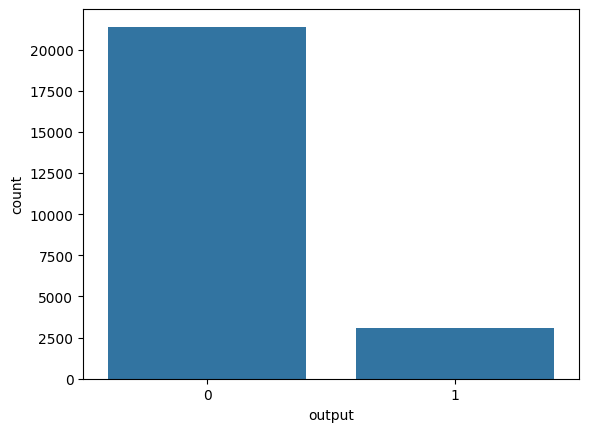

In [ ]:
# Create a countplot
sns.countplot(x="output", data=df)
plt.show()

Este gr√°fico muestra la distribuci√≥n del campo output, que indica si el cliente contrat√≥ un dep√≥sito a plazo. La mayor√≠a de los clientes no aceptaron la oferta (clase 0), superando los 900 registros, mientras que s√≥lo una minor√≠a s√≠ acept√≥ (clase 1), con poco m√°s de 100 casos.

La muestra est√° claramente desbalanceada, lo que puede sesgar los modelos predictivos hacia la clase mayoritaria. Ser√° importante aplicar t√©cnicas de balanceo o usar m√©tricas adecuadas para evaluar el desempe√±o real del modelo. Adem√°s, conviene explorar qu√© caracter√≠sticas distinguen a los pocos clientes que dijeron ‚Äús√≠‚Äù.


#### Histograma con KDE de age

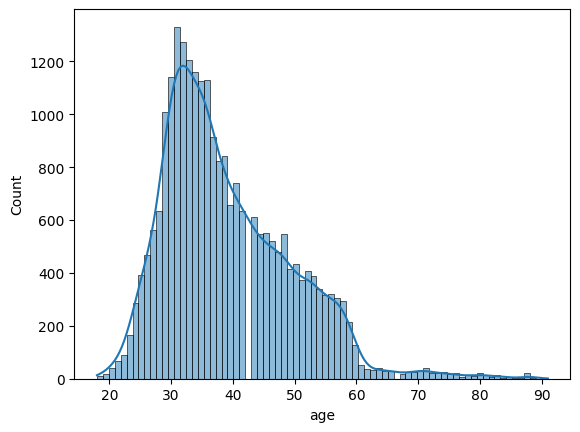

In [ ]:
sns.histplot(df['age'], kde=True)
plt.show()

Este gr√°fico muestra la distribuci√≥n de edades de los clientes en el dataset. La mayor√≠a se concentra entre los 30 y 40 a√±os, con un pico alrededor de los 32-35 a√±os, y una disminuci√≥n progresiva hacia edades mayores.

La distribuci√≥n tiene una asimetr√≠a negativa, con pocos casos por encima de los 60 a√±os y muy pocos extremos cercanos a los 90. Esto sugiere que el banco se enfoca principalmente en adultos j√≥venes y de mediana edad, que probablemente representan su p√∫blico objetivo para productos financieros como dep√≥sitos a plazo.

Un an√°lisis interesante ser√≠a explorar si la edad influye en la decisi√≥n de contratar un dep√≥sito, o si ciertos rangos etarios responden mejor a las campa√±as comerciales.


#### Box plot de balance

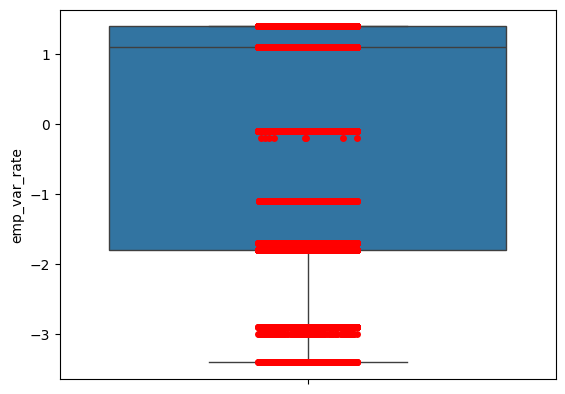

In [ ]:
sns.boxplot(df['emp_var_rate'])
sns.stripplot(df['emp_var_rate'], color='red')
plt.show()

Este boxplot muestra la distribuci√≥n de la variable emp_var_rate, que refleja la variaci√≥n del empleo. La mayor√≠a de los valores est√°n entre -2 y +1.4, con un pico cerca de 1.1, lo que indica un entorno laboral positivo en muchas campa√±as.

Sin embargo, hay varios outliers negativos, lo que sugiere que tambi√©n se incluyeron periodos econ√≥micos dif√≠ciles. Esta variable puede influir fuertemente en la decisi√≥n de los clientes al contratar un dep√≥sito.


#### Count plot de job_grouped

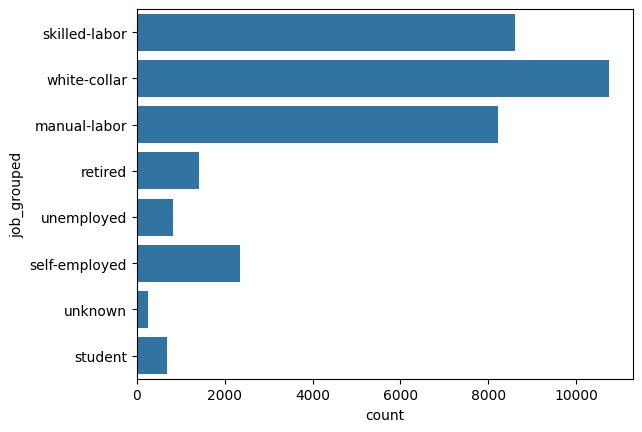

In [ ]:
sns.countplot(df['job_grouped'])
plt.show()

Este gr√°fico muestra la distribuci√≥n de ocupaciones tras agruparlas en categor√≠as m√°s amplias (job_grouped). La mayor√≠a de los clientes pertenece a los grupos "white-collar" y "skilled-labor", seguidos por "manual-labor".

Esto sugiere que el dataset est√° compuesto en su mayor√≠a por personas en edad laboral activa, con empleos administrativos, t√©cnicos o f√≠sicos. Las categor√≠as como "retired", "unemployed" y "student" son minoritarias, lo cual puede influir en su capacidad o inter√©s para contratar productos financieros como dep√≥sitos. Esta agrupaci√≥n facilita el an√°lisis de comportamiento por perfil laboral.


#### Pie chart de marital_status

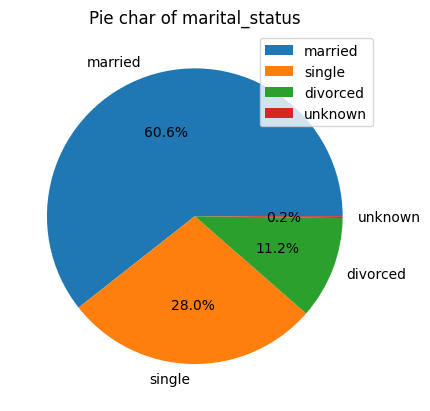

In [ ]:
vc = df['marital_status'].value_counts().reset_index()
keys = vc['marital_status'].to_list()
values = vc['count'].to_list()

plt.pie(values, labels=keys, autopct='%1.1f%%')
plt.legend()
plt.title('Pie char of marital_status')
plt.show()

Este gr√°fico circular muestra la distribuci√≥n del estado civil (marital_status) de los clientes. La mayor√≠a est√° casada (60.6%), seguida por personas solteras (28.0%) y divorciadas (11.2%). El grupo con estado civil desconocido es pr√°cticamente irrelevante (0.2%).

La predominancia de personas casadas podr√≠a influir en las decisiones financieras, como la contrataci√≥n de dep√≥sitos, ya que este grupo puede tener mayores responsabilidades econ√≥micas o un enfoque m√°s conservador. Comparar el comportamiento entre estados civiles puede revelar patrones valiosos en la toma de decisiones financieras.

## An√°lisis Multivariable

###An√°lisis con pandas

####An√°lisis Continuas VS Continuas

In [ ]:
# calculate the correlation matrix
df.corr(numeric_only=True)

age  campaing     pdays  previous  emp_var_rate  \
age               1.000000  0.001741 -0.033185  0.027960      0.001312   
campaing          0.001741  1.000000  0.051973 -0.076775      0.150669   
pdays            -0.033185  0.051973  1.000000 -0.590891      0.273400   
previous          0.027960 -0.076775 -0.590891  1.000000     -0.420349   
emp_var_rate      0.001312  0.150669  0.273400 -0.420349      1.000000   
cons_price_index  0.000850  0.129619  0.077120 -0.200746      0.775889   
cons_conf_index   0.129133 -0.013590 -0.089539 -0.050088      0.191731   
euribor_3m        0.012724  0.134940  0.300798 -0.455232      0.972142   
n_employed       -0.015338  0.143321  0.377213 -0.503215      0.906938   
output            0.026472 -0.067292 -0.328495  0.232538     -0.301702   

                  cons_price_index  cons_conf_index  euribor_3m  n_employed  \
age                       0.000850         0.129133    0.012724   -0.015338   
campaing                  0.129619        -0.013590    0.134940    0.143321   
pdays                     0.077120        -0.089539    0.300798    0.377213   
previous                 -0.200746        -0.050088   -0.455232   -0.503215   
emp_var_rate              0.775889         0.191731    0.972142    0.906938   
cons_price_index          1.000000         0.054922    0.688875    0.523109   
cons_conf_index           0.054922         1.000000    0.273746    0.097221   
euribor_3m                0.688875         0.273746    1.000000    0.945264   
n_employed                0.523109         0.097221    0.945264    1.000000   
output                   -0.138786         0.057704   -0.311144   -0.357851   

                    output  
age               0.026472  
campaing         -0.067292  
pdays            -0.328495  
previous          0.232538  
emp_var_rate     -0.301702  
cons_price_index -0.138786  
cons_conf_index   0.057704  
euribor_3m       -0.311144  
n_employed       -0.357851  
output            1.000000

#####**An√°lisis de correlaciones:**

**Factores que m√°s influyen en el resultado (output):**

- pdays (d√≠as desde el √∫ltimo contacto): Cuanto m√°s reciente el contacto, mejor el resultado de la campa√±a.

- previous (contactos previos exitosos): Si ya fue contactado antes, aumenta la probabilidad de √©xito.

- emp_var_rate, euribor_3m, n_employed (indicadores econ√≥micos): En general, un mejor contexto econ√≥mico est√° ligeramente asociado con peores resultados de campa√±a.

- campaign (n√∫mero de veces que se contact√≥ en la campa√±a): Tiene muy poca influencia directa.

**Relaciones destacadas entre variables:**

- Las variables macroecon√≥micas est√°n muy correlacionadas entre s√≠ (por ejemplo, euribor_3m y n_employed).

- pdays y previous est√°n fuertemente relacionadas: si fue contactado hace poco, es m√°s probable que tenga un historial de interacciones.

- Edad y confianza del consumidor casi no tienen efecto sobre el resultado.

**Conclusi√≥n:**
Para predecir si una campa√±a tendr√° √©xito, es m√°s √∫til fijarse en si el cliente ya fue contactado antes y hace cu√°nto tiempo, m√°s que en la situaci√≥n econ√≥mica o cu√°ntas veces lo contactamos ahora.

#### An√°lisis Continuas VS Categ√≥ricas

Primero, hacemos un evaluamos la normalidad de las variables, para saber qu√© test estad√≠stico utilizamos:

In [ ]:
from scipy.stats import normaltest

for col in df.select_dtypes(include='float'):
    _, p_value = normaltest(df[col], nan_policy='omit')

    if p_value < 0.05:
        print(f"üî¥ {col}: No proviene de una distribuci√≥n normal (p = {p_value:.4f})")
    else:
        print(f"üü¢ {col}: Probablemente proviene de una distribuci√≥n normal (p = {p_value:.4f})")


üî¥ emp_var_rate: No proviene de una distribuci√≥n normal (p = 0.0000)
üî¥ cons_price_index: No proviene de una distribuci√≥n normal (p = 0.0000)
üî¥ cons_conf_index: No proviene de una distribuci√≥n normal (p = 0.0000)
üî¥ euribor_3m: No proviene de una distribuci√≥n normal (p = 0.0000)
üî¥ n_employed: No proviene de una distribuci√≥n normal (p = 0.0000)


Ninguna sigue una distribuci√≥n normal, por lo que utilizaremos Kruskal-Wallis.

#####Kruskal-Wallis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33108 non-null  int64  
 1   job                33108 non-null  object 
 2   marital_status     33108 non-null  object 
 3   education_level    33108 non-null  object 
 4   is_default         33108 non-null  object 
 5   housing_type       33108 non-null  object 
 6   loan               33108 non-null  object 
 7   contact            33108 non-null  object 
 8   month              33108 non-null  object 
 9   day_of_week        33108 non-null  object 
 10  campaing           33108 non-null  int64  
 11  pdays              33108 non-null  int64  
 12  previous           33108 non-null  int64  
 13  poutcome           33108 non-null  object 
 14  emp_var_rate       33108 non-null  float64
 15  cons_price_index   33108 non-null  float64
 16  cons_conf_index    331

Comparo todas las variables num√©ricas con mi variable objetivo o target: "output".

In [ ]:
from scipy.stats import kruskal

# Filtrar solo variables num√©ricas y excluir 'output'
categoric_vars = [var for var in df.select_dtypes(include='number').columns]

# Iterar sobre todas las variables continuas
for var in categoric_vars:
    grouped_data = [group[var].dropna() for _, group in df.groupby('output')]
    h_statistic, p_value = kruskal(*grouped_data)

    print(f"\n Probando {var} con Output:")
    print(f"H = {h_statistic:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"‚ùå Hay diferencias significativas en {var} entre los grupos de  Output.")
    else:
        print(f"‚úÖ No hay diferencias significativas en {var} entre los grupos de Output.")



 Probando age con Output:
H = 8.8545, p-value = 0.0029
‚ùå Hay diferencias significativas en age entre los grupos de  Output.

 Probando campaing con Output:
H = 138.3185, p-value = 0.0000
‚ùå Hay diferencias significativas en campaing entre los grupos de  Output.

 Probando pdays con Output:
H = 3572.9396, p-value = 0.0000
‚ùå Hay diferencias significativas en pdays entre los grupos de  Output.

 Probando previous con Output:
H = 1422.7713, p-value = 0.0000
‚ùå Hay diferencias significativas en previous entre los grupos de  Output.

 Probando emp_var_rate con Output:
H = 2086.4845, p-value = 0.0000
‚ùå Hay diferencias significativas en emp_var_rate entre los grupos de  Output.

 Probando cons_price_index con Output:
H = 513.0470, p-value = 0.0000
‚ùå Hay diferencias significativas en cons_price_index entre los grupos de  Output.

 Probando cons_conf_index con Output:
H = 61.4233, p-value = 0.0000
‚ùå Hay diferencias significativas en cons_conf_index entre los grupos de  Output.

 Pro

El test de Kruskal-Wallis permite evaluar si existen diferencias estad√≠sticamente significativas entre dos o m√°s grupos independientes en relaci√≥n con una variable num√©rica. En este caso, se compararon los valores de varias variables continuas seg√∫n la variable objetivo output (0 = no respondi√≥, 1 = s√≠ respondi√≥).

**Variables con diferencias significativas (p < 0.05):**

Todas las variables evaluadas mostraron diferencias estad√≠sticamente significativas entre los grupos de output, lo que indica que su distribuci√≥n var√≠a en funci√≥n de la respuesta del cliente. Esto sugiere que podr√≠an tener potencial predictivo en modelos de clasificaci√≥n. A continuaci√≥n se destacan algunas:

- age (H = 8.85, p = 0.0029)
Aunque la diferencia es menos pronunciada que en otras variables, la edad presenta un patr√≥n distinto entre los grupos, lo que podr√≠a deberse a perfiles de edad m√°s receptivos a las campa√±as.

- campaign (H = 138.32, p < 0.0001)
El n√∫mero de contactos realizados durante la campa√±a afecta significativamente la respuesta. Podr√≠a haber un punto √≥ptimo de contacto tras el cual la probabilidad de respuesta disminuye.

- pdays (H = 3572.94, p < 0.0001)
Una de las variables m√°s determinantes. D√≠as desde el √∫ltimo contacto tiene una relaci√≥n clara con la respuesta: los clientes contactados recientemente suelen tener mayor tasa de respuesta.

- previous (H = 1422.77, p < 0.0001)
El n√∫mero de contactos previos exitosos tambi√©n est√° fuertemente asociado a la probabilidad de respuesta positiva.

**Indicadores econ√≥micos (emp_var_rate, euribor_3m, n_employed):**

Estas variables macroecon√≥micas presentan valores significativamente distintos seg√∫n output, lo que indica que el contexto econ√≥mico influye en la disposici√≥n del cliente a responder.

- emp_var_rate (H = 2086.48)

- euribor_3m (H = 2446.32)

- n_employed (H = 2740.39)

**cons_price_index y cons_conf_index:**

Reflejan la percepci√≥n econ√≥mica del consumidor. Tambi√©n tienen diferencias significativas entre los grupos, lo que indica que las campa√±as pueden tener m√°s √©xito en ciertos escenarios de confianza del consumidor.

**Conclusi√≥n general:**

Los resultados del test de Kruskal-Wallis revelan que todas las variables num√©ricas presentan diferencias significativas entre los grupos de respuesta (output). Esto valida su inclusi√≥n en modelos predictivos y sugiere que factores tanto individuales (edad, n√∫mero de contactos) como contextuales (indicadores econ√≥micos) influyen en la probabilidad de que un cliente acepte o no una oferta.



####An√°lisis Categ√≥ricas VS Categ√≥ricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33108 non-null  int64  
 1   job                33108 non-null  object 
 2   marital_status     33108 non-null  object 
 3   education_level    33108 non-null  object 
 4   is_default         33108 non-null  object 
 5   housing_type       33108 non-null  object 
 6   loan               33108 non-null  object 
 7   contact            33108 non-null  object 
 8   month              33108 non-null  object 
 9   day_of_week        33108 non-null  object 
 10  campaing           33108 non-null  int64  
 11  pdays              33108 non-null  int64  
 12  previous           33108 non-null  int64  
 13  poutcome           33108 non-null  object 
 14  emp_var_rate       33108 non-null  float64
 15  cons_price_index   33108 non-null  float64
 16  cons_conf_index    331

####Cram√©r‚Äôs V

In [ ]:
def cramers_v_test(df, categorical_variable1, categorical_variable2):

  # Create a contingency table
  contingency_table = pd.crosstab(df[categorical_variable1], df[categorical_variable2])

  # Perform the chi-squared test
  chi2_stat, _, _, _ = chi2_contingency(contingency_table)

  # Calculate Cram√©r's V
  n = contingency_table.sum().sum()
  min_dim = min(contingency_table.shape)
  cramers_v = np.sqrt(chi2_stat / (n * (min_dim - 1)))

  # Display the results
  # print(f"Chi-squared statistic: {chi2_stat}")
  return print(f"Cram√©r's V: {cramers_v}");

In [ ]:
from scipy.stats import chi2_contingency

# Suppose we want to examine the association between class and embarked
categorical_variable1 = 'output'
categorical_variable2 = 'job'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.1508117218363749


Existe una asociaci√≥n d√©bil entre el tipo de empleo y el resultado de la campa√±a (output). Aunque hay cierta relaci√≥n, no es suficientemente fuerte como para considerarse decisiva por s√≠ sola en la predicci√≥n del resultado.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'marital_status'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.055583467045961364


Aqu√≠ encontramos una asociaci√≥n muy d√©bil. El estado civil de la persona tiene poca relaci√≥n con la probabilidad de que responda positivamente a la campa√±a. Esto indica que estar casado, soltero o divorciado no influye de forma relevante en el resultado.





In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'education_level'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.07264026400366012


Aqu√≠ encontramos una asociaci√≥n muy d√©bil. El nivel educativo de la persona muestra una relaci√≥n apenas perceptible con la probabilidad de √©xito de la campa√±a. Esto sugiere que, en general, tener estudios primarios, secundarios o universitarios no influye de manera significativa en la decisi√≥n de responder afirmativamente.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'housing_type'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.011801515159272866


Aqu√≠ la relaci√≥n es nula. Tener o no vivienda propia no est√° asociado con la respuesta de la campa√±a.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'loan'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.005628855790051119


Aqu√≠ encontramos una asociaci√≥n nula. Tener o no un pr√©stamo personal no guarda relaci√≥n con la respuesta del cliente ante la campa√±a. Este resultado indica que esta variable no aporta valor predictivo relevante para explicar el comportamiento del output.


In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'contact'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.14551589958062802


Aqu√≠ encontramos una asociaci√≥n d√©bil, pero notable. El tipo de contacto (por ejemplo, tel√©fono fijo o m√≥vil) muestra cierta relaci√≥n con la probabilidad de √©xito de la campa√±a. Esto sugiere que el canal por el que se contacta a la persona puede influir ligeramente en su decisi√≥n de responder afirmativamente. Aunque la relaci√≥n no es fuerte, podr√≠a ser un aspecto a tener en cuenta al planificar estrategias de contacto.










In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'month'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.27284446202525586


Aqu√≠ encontramos una **asociaci√≥n moderada**. El mes en que se realiz√≥ el contacto tiene un impacto relevante en la probabilidad de √©xito. Podr√≠a estar relacionado con estacionalidad, promociones o disponibilidad de los clientes.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'day_of_week'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.025204460230810213


La relaci√≥n es muy baja, por lo que el d√≠a de la semana parece no influir significativamente en la decisi√≥n del cliente.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'poutcome'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.3264296128277708


Aqu√≠ encontramos una asociaci√≥n **moderada-alta**. El resultado de campa√±as anteriores est√° significativamente relacionado con la respuesta actual del cliente. Esto sugiere que las personas que respondieron positivamente en el pasado tienen m√°s probabilidades de hacerlo nuevamente, lo cual es coherente con comportamientos repetitivos o fidelizaci√≥n. Es una variable valiosa a tener en cuenta en modelos predictivos o al segmentar la base de contactos.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'job_grouped'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.14792296015016712


La versi√≥n agrupada del empleo conserva una asociaci√≥n d√©bil, similar a la variable original job, lo cual indica que la agrupaci√≥n no mejor√≥ sustancialmente su capacidad explicativa.

In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'education_grouped'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cram√©r's V: 0.06582772504969407


Aqu√≠ encontramos una **asociaci√≥n muy d√©bil**. Agrupar los niveles educativos no mejora sustancialmente la relaci√≥n con la respuesta del cliente. Esto indica que, de forma general, **el nivel de estudios agrupado no tiene un impacto relevante** en la probabilidad de √©xito de la campa√±a.

**Conclusiones principales:**
Las variables con mayor relaci√≥n con output son poutcome (0.326) y month (0.274), lo que indica que el resultado de campa√±as anteriores y el mes del contacto tienen un impacto relevante en la probabilidad de √©xito.

Les siguen job, contact y job_grouped, con asociaciones d√©biles pero notables (Cram√©r‚Äôs V en el rango de ~0.14‚Äì0.15), por lo que podr√≠an aportar valor al modelo, especialmente en combinaci√≥n con otras variables.

En cambio, variables como loan, housing_type, marital_status, education_level y education_grouped tienen una influencia pr√°cticamente nula, por lo que su inclusi√≥n en el modelo podr√≠a no ser necesaria, a menos que participen en interacciones m√°s complejas.




### An√°lisis con Seaborn

#### An√°lisis Continuas VS Continuas

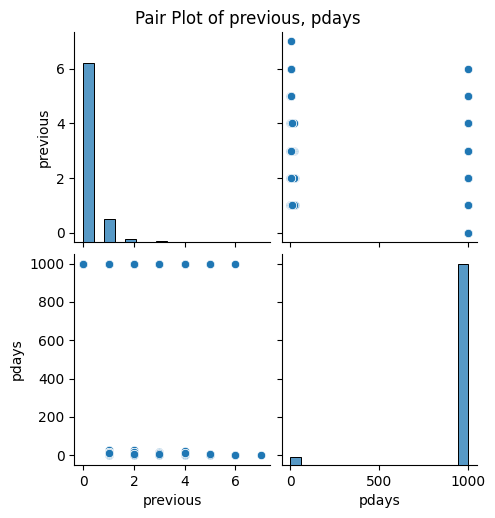

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["previous","pdays"])
plt.suptitle("Pair Plot of previous, pdays", y=1.02)
plt.show()

El gr√°fico compara las variables previous (n√∫mero de contactos previos) y pdays (n√∫mero de d√≠as desde el √∫ltimo contacto). Ambas est√°n relacionadas con el historial de contacto del cliente en campa√±as anteriores.

La variable previous muestra una distribuci√≥n fuertemente sesgada hacia valores bajos, con la mayor√≠a de los clientes habiendo recibido entre 0 y 2 contactos anteriores. En cuanto a pdays, se observa una marcada acumulaci√≥n en el valor 999, que generalmente representa que el cliente no fue contactado previamente. El resto de los valores est√° m√°s distribuido por debajo de los 300 d√≠as.

En el gr√°fico de dispersi√≥n se aprecia una relaci√≥n clara: cuando pdays es 999, previous suele ser 0, lo que confirma que no hubo contacto anterior. En los casos donde pdays es menor a 999, los valores de previous aumentan ligeramente, lo que indica presencia de interacci√≥n previa reciente.

En resumen, ambas variables est√°n l√≥gicamente relacionadas y reflejan patrones esperables en los datos. Ser√≠a conveniente considerar pdays = 999 como un valor especial (o convertirlo en una categor√≠a binaria), lo que puede ayudar a mejorar la calidad de las variables en futuros modelos predictivos.

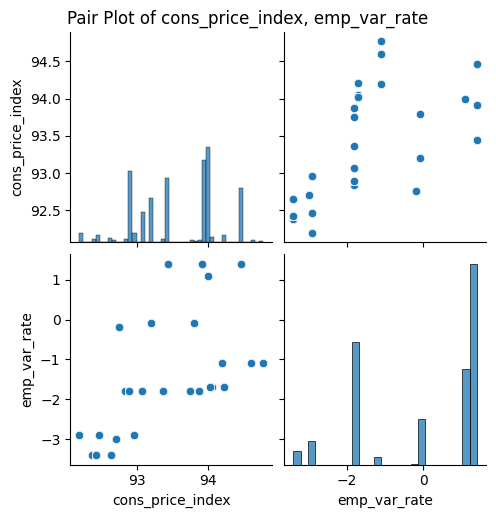

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["cons_price_index","emp_var_rate"])
plt.suptitle("Pair Plot of cons_price_index, emp_var_rate", y=1.02)
plt.show()

El an√°lisis conjunto del cons_price_index y el emp_var_rate revela una posible relaci√≥n positiva: a medida que aumenta el √≠ndice de precios al consumidor, tambi√©n tiende a incrementarse la variaci√≥n del empleo. Sin embargo, esta relaci√≥n no es estrictamente lineal, ya que se observa una alta dispersi√≥n de puntos en ciertos rangos. Adem√°s, ambas variables presentan valores concentrados en intervalos espec√≠ficos, lo que sugiere registros discretos o redondeados. En general, el gr√°fico sugiere una asociaci√≥n entre ambas variables, aunque podr√≠an estar influidas por otros factores no representados.


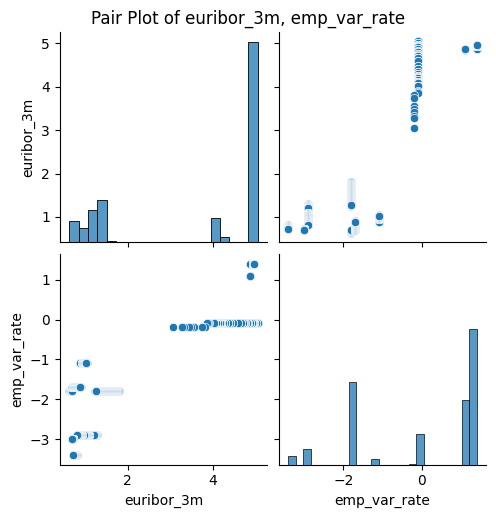

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["euribor_3m","emp_var_rate"])
plt.suptitle("Pair Plot of euribor_3m, emp_var_rate", y=1.02)
plt.show()

El gr√°fico revela una fuerte relaci√≥n positiva entre el eur√≠bor a 3 meses (euribor_3m) y la tasa de variaci√≥n del empleo (emp_var_rate). A medida que aumenta el valor del eur√≠bor, tambi√©n lo hace la tasa de variaci√≥n del empleo, lo que sugiere que ambos indicadores tienden a moverse en la misma direcci√≥n.

Sin embargo, esta relaci√≥n no es continua, sino que se da en niveles discretos. En particular, se observa una gran concentraci√≥n de puntos en torno a ciertos valores fijos del eur√≠bor (como 4.9 o 5.0) y de la tasa de empleo, lo que indica que estas variables podr√≠an estar influenciadas por decisiones de pol√≠tica econ√≥mica o eventos espec√≠ficos.

Adem√°s, los histogramas muestran una fuerte asimetr√≠a: la mayor√≠a de los datos se agrupan en valores altos del eur√≠bor y en valores negativos o nulos del emp_var_rate. Esto sugiere que los periodos de alta tasa de inter√©s coinciden con contextos econ√≥micos con poca o negativa variaci√≥n del empleo.

En conjunto, el gr√°fico indica que existe una asociaci√≥n clara entre ambas variables, aunque su comportamiento escalonado sugiere que podr√≠an estar sujetas a cambios estructurales o categorizaciones propias del conjunto de datos.



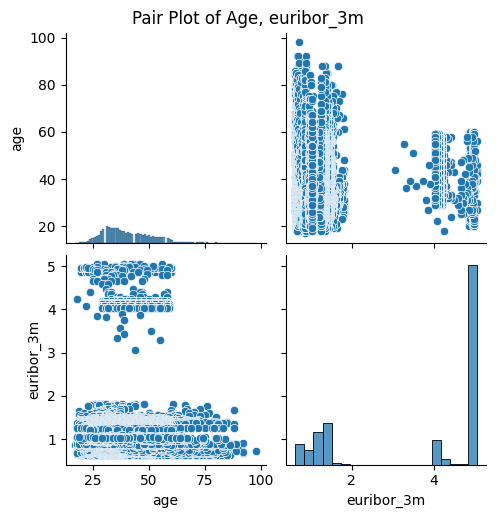

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["age","euribor_3m"])
plt.suptitle("Pair Plot of Age, euribor_3m", y=1.02)
plt.show()

El gr√°fico de pares presentado compara la edad del cliente (age) con la tasa de inter√©s Euribor a 3 meses (euribor_3m), una variable macroecon√≥mica relevante en campa√±as bancarias. En la diagonal se observa que la edad tiene una distribuci√≥n sesgada hacia la derecha, con una alta concentraci√≥n de clientes entre los 25 y 60 a√±os. Por su parte, euribor_3m presenta una distribuci√≥n bimodal, con agrupaciones en torno al 1% y al 4-5%, lo que sugiere que los datos fueron recolectados en diferentes contextos econ√≥micos.

Al observar la relaci√≥n entre ambas variables, no se aprecia una correlaci√≥n directa entre la edad de los clientes y el nivel del Euribor. Personas de todas las edades aparecen tanto en contextos de tasas altas como bajas, lo que indica que no hubo un sesgo etario en la estrategia de contacto de las campa√±as.

Finalmente, el gr√°fico refleja impl√≠citamente una dimensi√≥n temporal a trav√©s de los cambios en el Euribor. Aunque no se ve una relaci√≥n clara entre las variables analizadas, ser√≠a interesante incorporar una dimensi√≥n de tiempo o la variable objetivo (output) para entender mejor c√≥mo influyen estas variables en la respuesta del cliente.

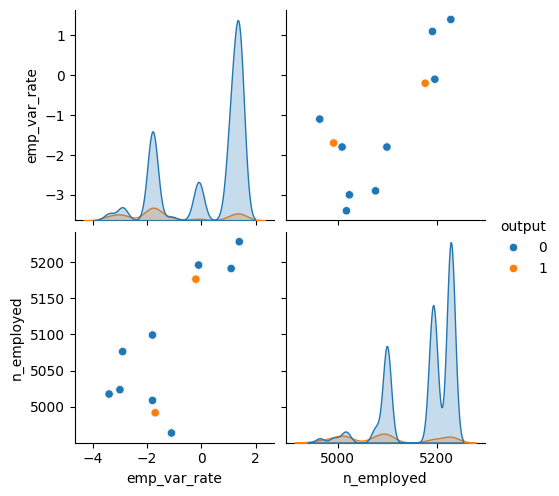

In [ ]:
sns.pairplot(df, hue="output", diag_kind="kde", vars=['emp_var_rate', 'n_employed'])
plt.show()

El gr√°fico muestra la relaci√≥n entre la tasa de variaci√≥n del empleo (emp_var_rate) y el n√∫mero total de empleados (n_employed), diferenciando por la variable output, que representa la respuesta del cliente (0 = no, 1 = s√≠).

Los histogramas y curvas de densidad indican que ambos indicadores est√°n fuertemente concentrados en unos pocos valores discretos, lo que sugiere que no son variables continuas en este conjunto, sino que reflejan estados econ√≥micos espec√≠ficos o fechas puntuales de medici√≥n.

En cuanto a la relaci√≥n entre las variables, se observa una fuerte correlaci√≥n positiva: a mayor n√∫mero de empleados, mayor es la tasa de variaci√≥n del empleo. Esto es coherente con escenarios de expansi√≥n econ√≥mica.

Respecto a la variable objetivo (output), la mayor√≠a de los puntos donde los clientes respondieron positivamente (color naranja) se ubican en los niveles m√°s altos de emp_var_rate y n_employed. Esto sugiere que las campa√±as son m√°s efectivas en contextos econ√≥micos favorables, cuando el empleo crece y hay m√°s personas trabajando.

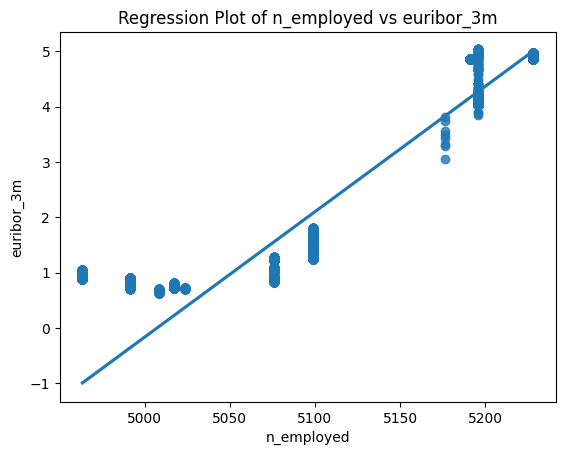

In [ ]:
# Regression plot
sns.regplot(x="n_employed", y="euribor_3m", data=df)
plt.title("Regression Plot of n_employed vs euribor_3m")
plt.show()

El gr√°fico muestra una clara relaci√≥n positiva entre el n√∫mero de empleados (n_employed) y el valor del eur√≠bor a 3 meses (euribor_3m). A medida que aumenta el n√∫mero de empleados, tambi√©n lo hace el valor del eur√≠bor, lo cual se refleja en la pendiente ascendente de la l√≠nea de regresi√≥n.

**Observaciones destacadas:**
- Los datos presentan una fuerte alineaci√≥n con la recta, lo que indica una correlaci√≥n positiva alta entre ambas variables.

- Se evidencia un comportamiento escalonado o agrupado: los valores no est√°n distribuidos de forma continua, sino que se concentran en puntos espec√≠ficos. Esto sugiere que ambas variables podr√≠an haber sido registradas en fechas puntuales (por ejemplo, mensualmente o trimestralmente).

- No se aprecian valores at√≠picos extremos que distorsionen la tendencia general.

**Interpretaci√≥n:**
Esta relaci√≥n puede interpretarse como una conexi√≥n directa entre la actividad econ√≥mica y la pol√≠tica monetaria. En contextos con m√°s empleo (indicador de crecimiento econ√≥mico), el eur√≠bor tambi√©n tiende a subir, reflejando una pol√≠tica de tipos de inter√©s m√°s elevada.

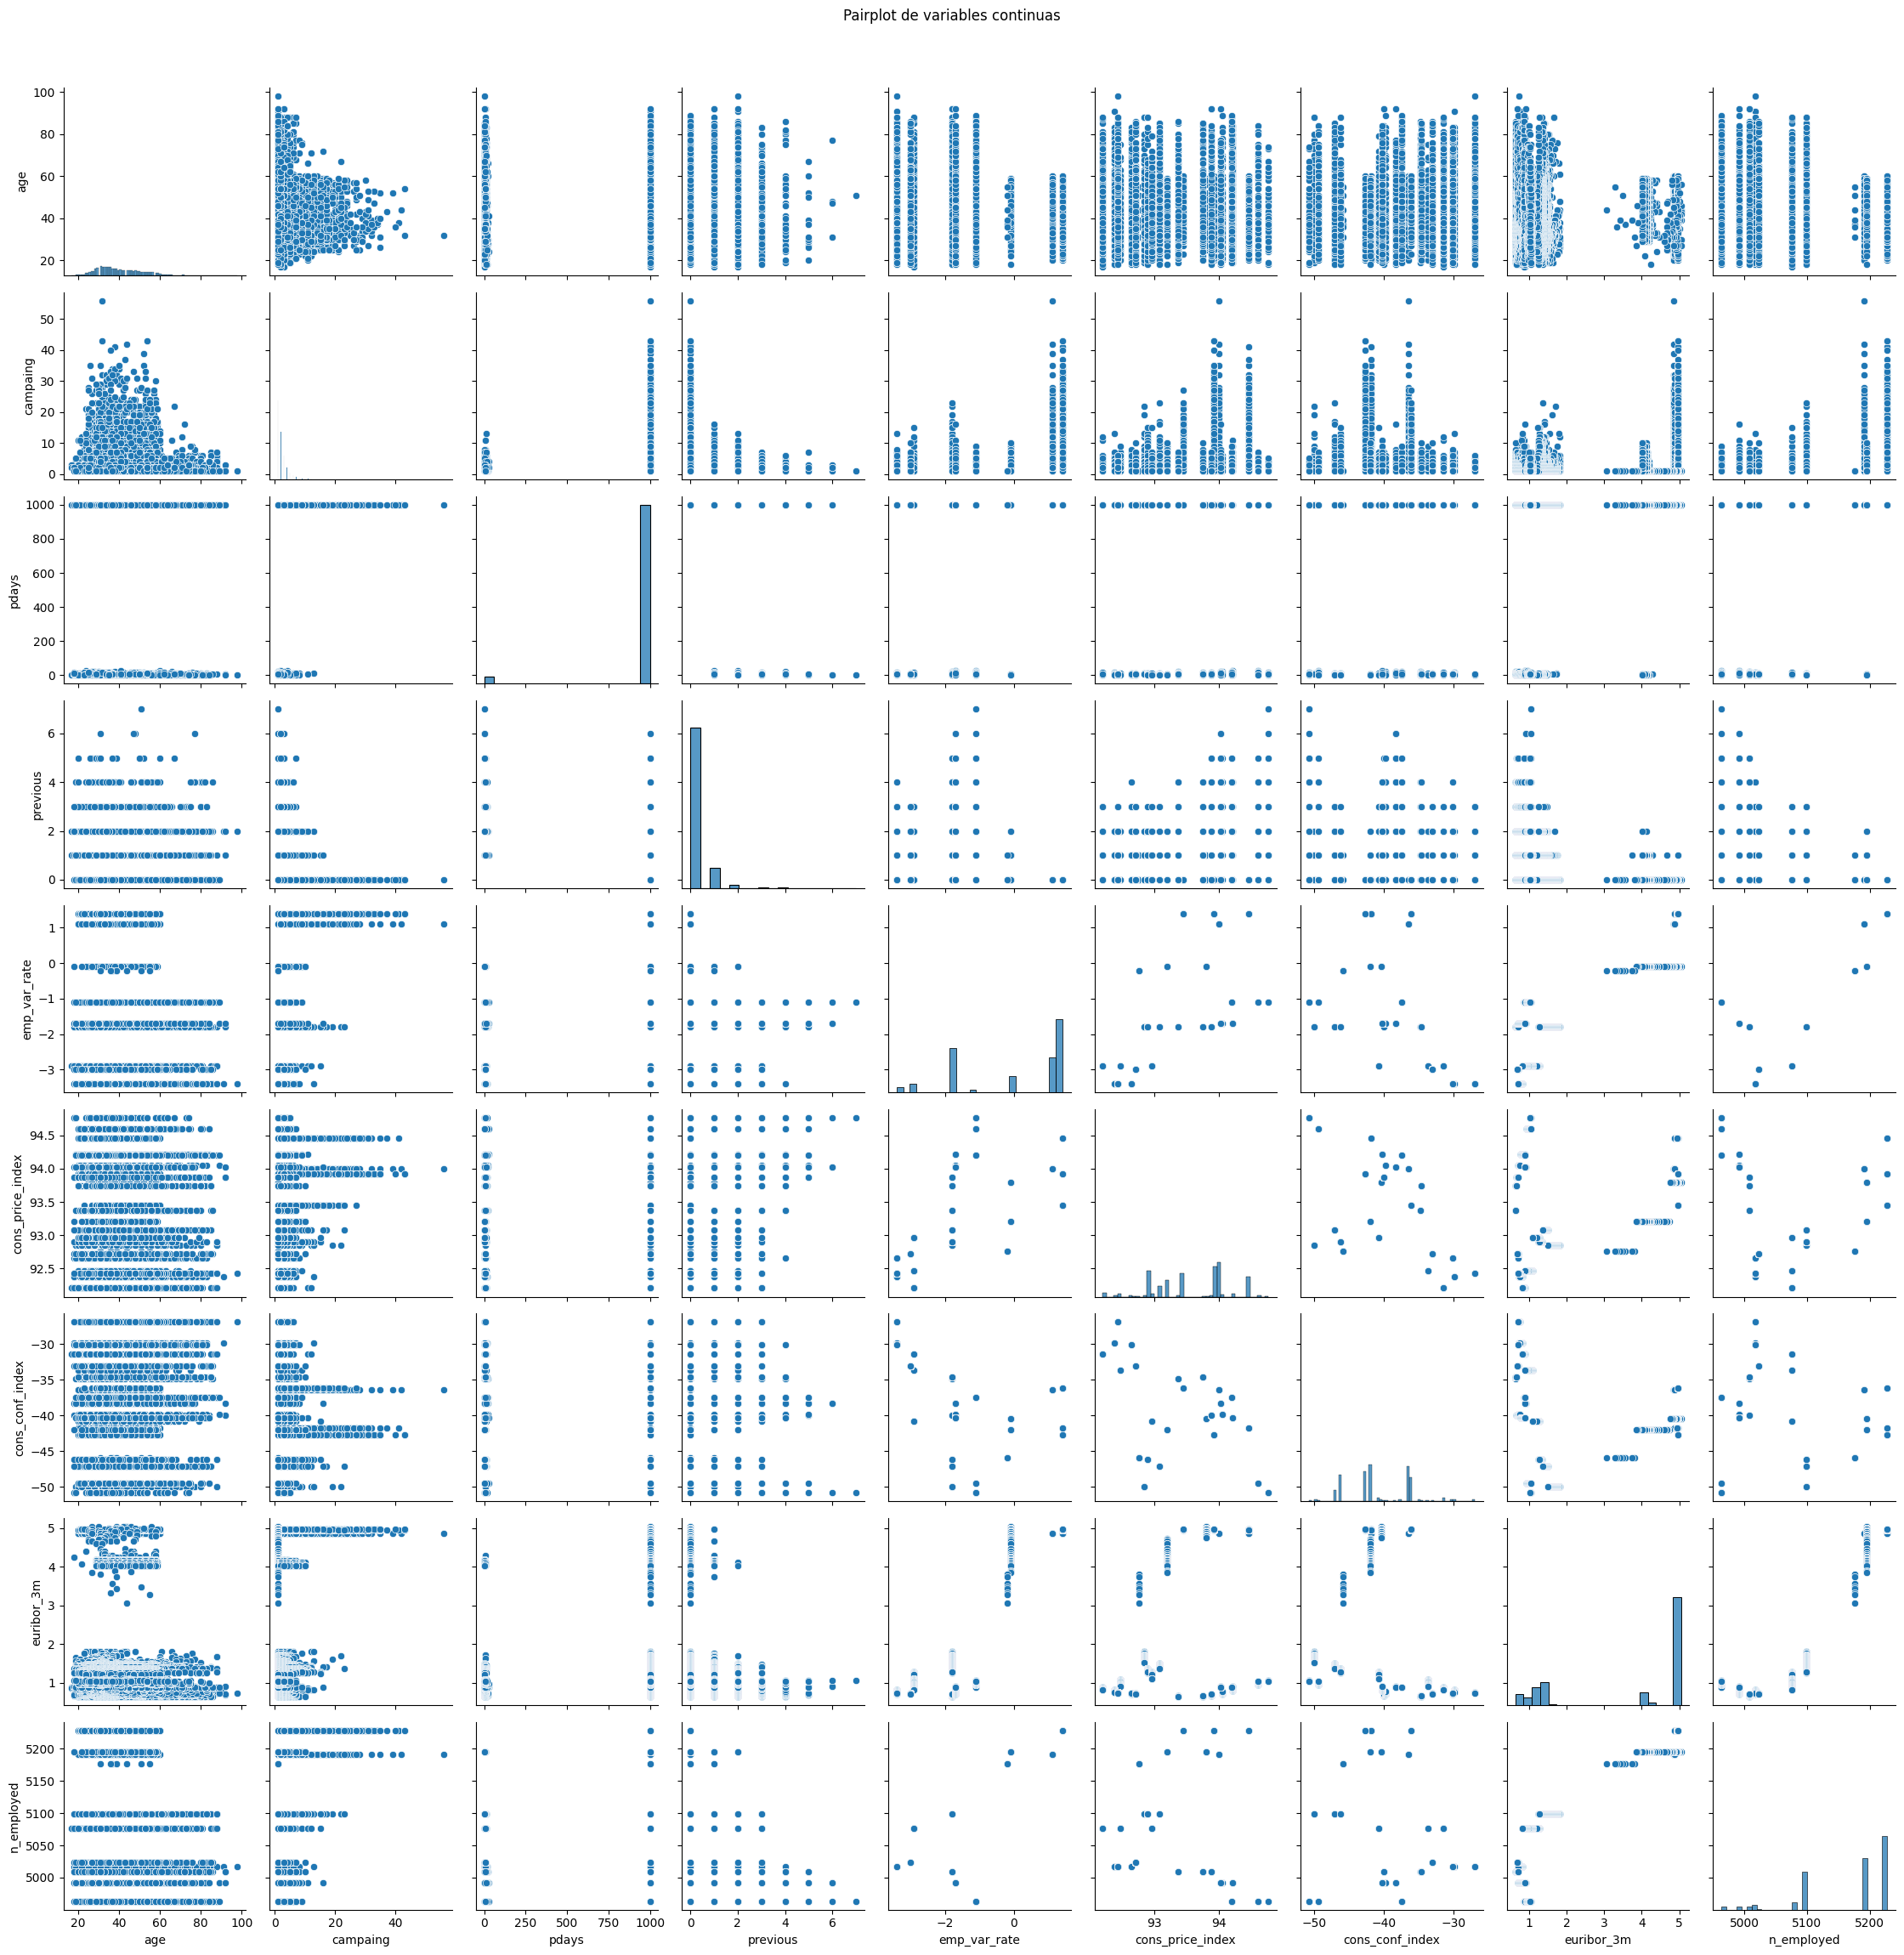

In [ ]:
# Filtrar variables continuas (exceptuando id y output si est√°n presentes)
continuous_vars = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id', 'output'], errors='ignore')

# Pairplot de variables continuas
sns.pairplot(continuous_vars)
plt.suptitle("Pairplot de variables continuas", y=1.02)
plt.tight_layout()
plt.show()

Este gr√°fico de pares muestra tanto la distribuci√≥n univariada de cada variable (en la diagonal) como las relaciones bivariadas (fuera de la diagonal). Es una herramienta muy √∫til para detectar correlaciones, outliers, patrones y redundancias en datos num√©ricos.

**üìä Distribuci√≥n de Variables (Diagonal):**
- Edad (age) presenta una distribuci√≥n sesgada a la derecha, concentrando la mayor√≠a de observaciones entre los 25 y 60 a√±os.

- Campaing, pdays, previous tienen distribuciones muy sesgadas, con fuerte acumulaci√≥n en valores bajos (o extremos como 999 en pdays).

- √çndices macroecon√≥micos como emp_var_rate, euribor_3m y n_employed presentan distribuciones con picos definidos, lo que sugiere recolecci√≥n en periodos econ√≥micos clave.

- cons_price_index y cons_conf_index muestran una menor dispersi√≥n y formas m√°s suaves, aunque con cierta concentraci√≥n en puntos espec√≠ficos.

**üîó Relaciones Bivariadas (Fuera de la Diagonal)**

- age vs campaing: No hay una relaci√≥n clara; clientes de todas las edades fueron contactados con diferentes frecuencias.

- pdays vs previous: Se nota cierta relaci√≥n: clientes con pdays bajo (tiempo desde el √∫ltimo contacto) tienden a haber sido contactados m√°s veces antes.

- emp_var_rate vs euribor_3m: Existe una relaci√≥n positiva clara, reflejando coherencia entre estas dos variables macroecon√≥micas.

- euribor_3m vs n_employed: Muestra una tendencia ascendente: a mayor tasa de inter√©s, mayor n√∫mero de empleados, lo cual es coherente con ciclos econ√≥micos positivos.

- cons_price_index vs cons_conf_index: Relaci√≥n inversa d√©bil. Podr√≠a haber una leve tendencia que indica que mayores precios reducen la confianza del consumidor.

La mayor√≠a de los pares no muestran relaciones lineales evidentes, pero s√≠ agrupaciones o bandas que podr√≠an ser √∫tiles en an√°lisis posteriores.

**‚ö†Ô∏è Presencia de Outliers:**

campaing y pdays tienen valores extremos que destacan claramente.

Tambi√©n hay outliers visibles en variables como previous y n_employed, que podr√≠an distorsionar modelos sensibles a escalas.

**‚úÖ Conclusiones:**

- Correlaciones relevantes: Hay relaciones claras entre algunas variables macroecon√≥micas, lo que puede indicar redundancia o la posibilidad de usar reducci√≥n de dimensionalidad (e.g. PCA).

- Variables con sesgo: pdays, previous, campaing presentan sesgos importantes y presencia de valores extremos.

- Potencial de agrupaci√≥n: Se observan formaciones que podr√≠an ser explotadas mediante clustering o segmentaci√≥n avanzada.

#### An√°lisis Continuas VS Categ√≥ricas

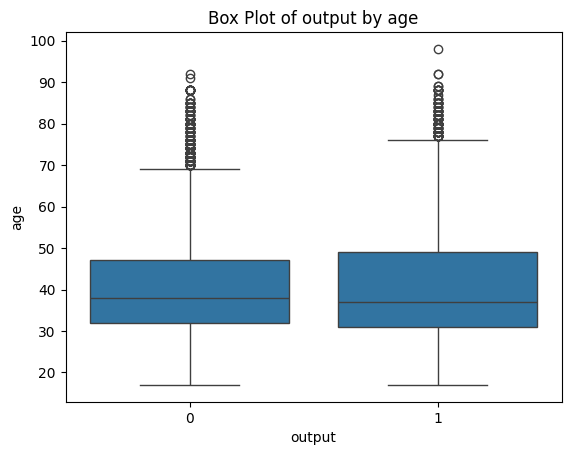

In [ ]:
# Box plot with scatter plot
sns.boxplot(x="output", y="age", data=df)
plt.title("Box Plot of output by age")
plt.show()


En ambos grupos (output = 0 y 1), la distribuci√≥n de edades es bastante similar. La mediana de edad ronda los 36 a√±os en ambos casos, lo que indica que la edad media no var√≠a significativamente entre quienes respondieron y quienes no.

Sin embargo, se observan algunos matices interesantes:

- El grupo que respondi√≥ positivamente a la campa√±a (output = 1) tiene una distribuci√≥n ligeramente m√°s dispersa hacia edades m√°s avanzadas.

- En ambos casos hay outliers por encima de los 70 a√±os, lo que indica que existen clientes mayores con comportamiento at√≠pico, pero consistentes entre ambas clases.

- El rango intercuart√≠lico (IQR) es muy similar en ambos grupos, lo que sugiere que la edad por s√≠ sola no tiene un impacto marcado sobre la probabilidad de respuesta.

Aunque hay una leve mayor dispersi√≥n hacia edades altas en los que respondieron, la edad no parece ser un factor determinante entre los que aceptaron o no la campa√±a. Este tipo de an√°lisis es √∫til para validar hip√≥tesis iniciales y tomar decisiones sobre la inclusi√≥n de variables en modelos predictivos. Para profundizar, podr√≠a combinarse con otras variables (como educaci√≥n o historial de contacto).



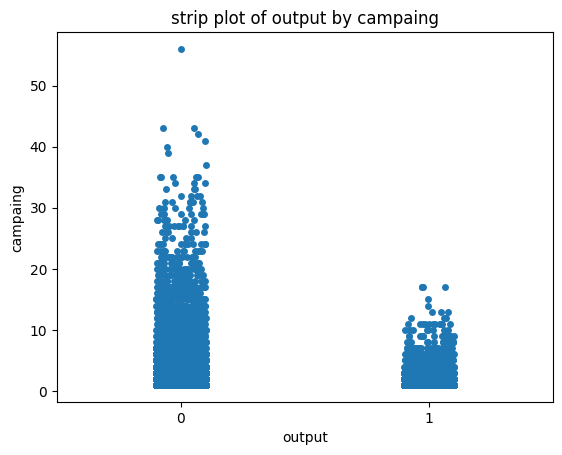

In [ ]:
sns.stripplot(data=df, x='output', y='campaing')
plt.title("strip plot of output by campaing")
plt.show()

Este gr√°fico es un strip plot que representa la cantidad de contactos realizados durante la campa√±a (campaing) en funci√≥n de la respuesta del cliente (output), donde 0 indica que no respondi√≥ y 1 que s√≠ respondi√≥.

El gr√°fico muestra una diferencia clara en el n√∫mero de contactos entre los dos grupos:

- Clientes que no respondieron (output = 0) fueron contactados muchas m√°s veces. Hay numerosos casos con campa√±as que superan los 20 contactos, e incluso valores extremos por encima de 50.

- Clientes que s√≠ respondieron (output = 1) se concentran principalmente en campa√±as con menos de 10 contactos. La densidad de puntos disminuye notablemente a medida que aumenta la cantidad de llamadas.

Este gr√°fico sugiere que cuantos m√°s contactos se realizan a un cliente, menor es la probabilidad de obtener una respuesta positiva. Por el contrario, las respuestas afirmativas tienden a ocurrir con pocos intentos, lo que podr√≠a indicar que los clientes decididos lo hacen r√°pidamente, y que insistir muchas veces resulta poco efectivo.

Este comportamiento podr√≠a ser aprovechado para optimizar recursos en campa√±as futuras, limitando el n√∫mero de intentos a clientes con baja probabilidad de respuesta tras cierto umbral.



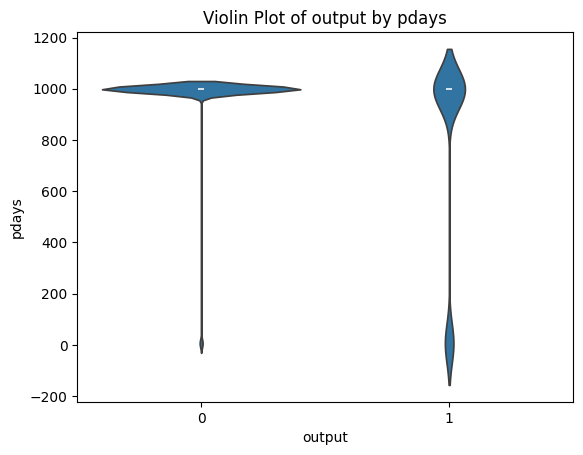

In [ ]:
sns.violinplot(x="output", y="pdays", data=df)
plt.title("Violin Plot of output by pdays")
plt.show()

Este gr√°fico es un violin plot que muestra la distribuci√≥n de la variable pdays (n√∫mero de d√≠as desde el √∫ltimo contacto previo) en funci√≥n del resultado de la campa√±a (output: 0 = no respondi√≥, 1 = respondi√≥).

- En ambos grupos (output = 0 y 1), hay una concentraci√≥n muy marcada en el valor 999, lo que t√≠picamente indica que el cliente no fue contactado previamente. Este valor especial domina la distribuci√≥n, sobre todo en quienes no respondieron.

- Entre quienes s√≠ respondieron (output = 1), hay una mayor dispersi√≥n en los valores de pdays, con presencia significativa de clientes que fueron contactados recientemente (valores bajos). Esto sugiere que los contactos m√°s recientes est√°n m√°s asociados a respuestas positivas.

- En cambio, los que no respondieron presentan una distribuci√≥n mucho m√°s concentrada en 999, lo que indica que no haber sido contactado previamente se asocia con una menor probabilidad de respuesta.

Este gr√°fico revela una relaci√≥n importante: la historia de contacto previo afecta la respuesta del cliente. Espec√≠ficamente, los clientes que han sido contactados en campa√±as anteriores (especialmente de forma reciente) tienen m√°s probabilidad de responder. Por tanto, pdays puede ser una variable predictiva √∫til, especialmente si se trata de forma adecuada (por ejemplo, considerando 999 como una categor√≠a especial).



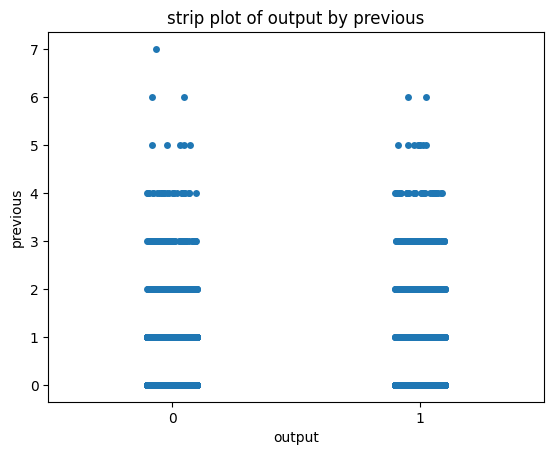

In [ ]:
# stripplot
sns.stripplot(data=df, x='output', y='previous')
plt.title("strip plot of output by previous")
plt.show()

Este gr√°fico es un strip plot que representa la variable previous (n√∫mero de contactos anteriores a la campa√±a actual) en funci√≥n del resultado (output: 0 = no respondi√≥, 1 = respondi√≥).

- Se observa que en ambos grupos (output = 0 y output = 1), los valores de previous est√°n mayoritariamente entre 0 y 2, con unos pocos casos que llegan hasta 7.

- Aunque las distribuciones son bastante similares, hay una ligera mayor densidad de valores de previous > 0 en el grupo de output = 1, lo que sugiere que haber sido contactado previamente podr√≠a aumentar la probabilidad de respuesta.

- Los valores est√°n discretamente espaciados, lo que indica que previous es una variable num√©rica con valores enteros y rango limitado, ideal para an√°lisis de frecuencia o modelos con codificaci√≥n ordinal.

Este gr√°fico confirma que la mayor√≠a de los clientes fueron contactados pocas veces antes, y que los que respondieron (output = 1) tienden a tener un historial ligeramente m√°s activo de contactos previos.

Aunque la diferencia no es dr√°stica, la variable previous tiene potencial como predictor, especialmente si se combina con otras como pdays para capturar tanto la frecuencia como la recencia del contacto.



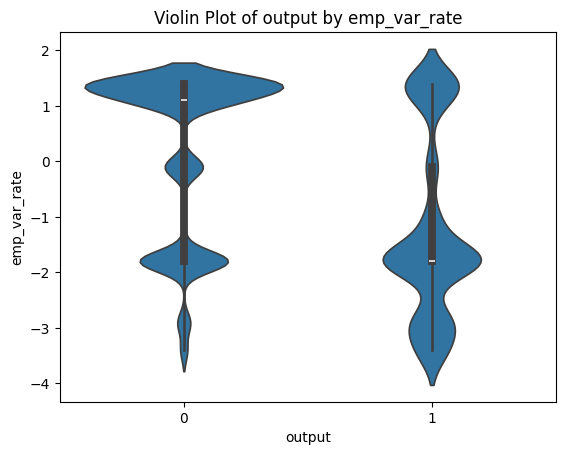

In [ ]:
# violinplot
sns.violinplot(x="output", y="emp_var_rate", data=df)
plt.title("Violin Plot of output by emp_var_rate")
plt.show()

Este gr√°fico es un violin plot que muestra la distribuci√≥n de la tasa de variaci√≥n del empleo (emp_var_rate) en funci√≥n del resultado de la campa√±a (output: 0 = no respondi√≥, 1 = respondi√≥). Este tipo de gr√°fico combina una distribuci√≥n de densidad con un box plot interno para facilitar la comparaci√≥n entre categor√≠as.


- Para output = 0 (clientes que no respondieron), la distribuci√≥n de emp_var_rate est√° altamente concentrada en valores positivos, especialmente alrededor de 1.1 a 1.4. Esto sugiere que la mayor√≠a de los contactos se realizaron en contextos de crecimiento econ√≥mico o mejora del empleo, pero con baja efectividad.

- Para output = 1 (clientes que s√≠ respondieron), la distribuci√≥n es mucho m√°s amplia y centrada en valores negativos, con presencia destacada en -1.8 y -3.4. Esto indica que, en contextos econ√≥micos m√°s dif√≠ciles, los clientes mostraron mayor receptividad a las campa√±as.

- En ambos grupos se aprecian varios picos, lo que revela que las campa√±as se realizaron en momentos espec√≠ficos de evoluci√≥n econ√≥mica y no de forma continua.


Este gr√°fico refuerza la idea de que las campa√±as bancarias fueron m√°s efectivas cuando la situaci√≥n econ√≥mica era m√°s desfavorable. A pesar de que la mayor√≠a de los contactos se hicieron en momentos positivos (alta tasa de empleo), fue en los periodos con tasas negativas donde se obtuvieron mejores respuestas.

La variable emp_var_rate resulta ser altamente informativa y deber√≠a considerarse clave en modelos predictivos, especialmente si se trata como variable categ√≥rica o ordinal.



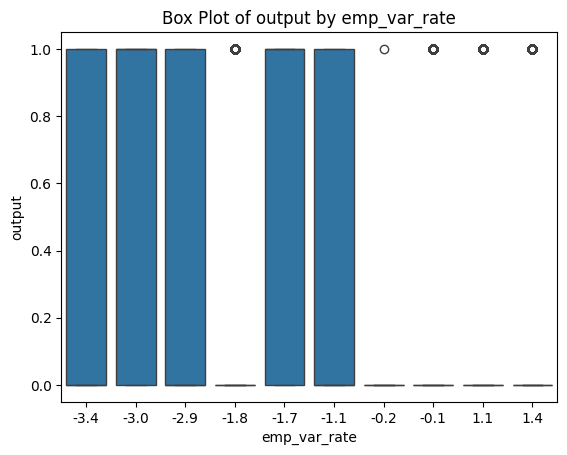

In [ ]:
# Box plot with scatter plot
sns.boxplot(y="output", x="emp_var_rate", data=df)
plt.title("Box Plot of output by emp_var_rate")
plt.show()

Este box plot muestra la variable de respuesta (output) en funci√≥n de la tasa de variaci√≥n del empleo (emp_var_rate), una variable macroecon√≥mica categorizada.

- Para valores negativos de emp_var_rate (como -3.4, -3.0, -2.9, -1.8, -1.7, -1.1), el output tiende a ser 1, es decir, hay m√°s respuestas positivas. Las cajas est√°n centradas en 1, lo que indica que en contextos econ√≥micos desfavorables hubo mejor rendimiento de la campa√±a.

- En cambio, para valores positivos o neutros de emp_var_rate (como -0.2, -0.1, 0.1, 1.1, 1.4), el output se concentra en 0, lo que sugiere menos respuestas positivas en contextos con crecimiento del empleo.

- Los puntos fuera de las cajas son outliers, es decir, respuestas que se apartan del patr√≥n general esperado para cada valor de la variable econ√≥mica.


El gr√°fico revela un patr√≥n llamativo: las campa√±as fueron m√°s efectivas en contextos de desempleo o recesi√≥n, donde las tasas de empleo eran negativas. Esto puede deberse a que los clientes, en contextos econ√≥micos m√°s dif√≠ciles, est√°n m√°s receptivos a las ofertas bancarias.

Esta relaci√≥n no es lineal, pero s√≠ categ√≥ricamente significativa, por lo que emp_var_rate es una variable predictiva potente y deber√≠a ser tratada como una categor√≠a en modelos o decisiones de segmentaci√≥n.



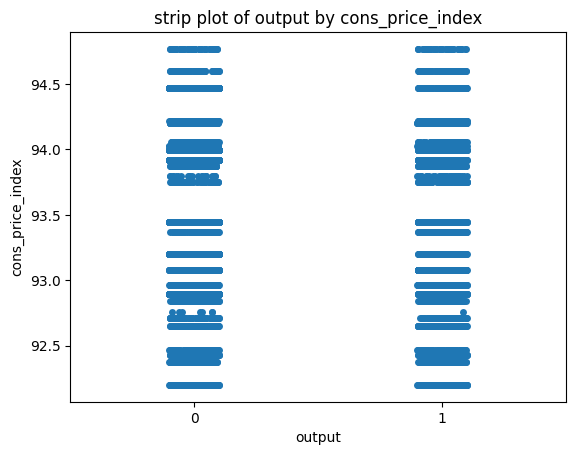

In [ ]:
# stripplot
sns.stripplot(data=df, x='output', y='cons_price_index')
plt.title("strip plot of output by cons_price_index")
plt.show()

- Los valores del cons_price_index est√°n agrupados en escalones discretos, lo que indica que esta variable, aunque num√©rica, toma valores fijos o medidos en intervalos espec√≠ficos (por ejemplo: 92.5, 93.0, 94.0...).

- Tanto para output = 0 como para output = 1, los puntos est√°n distribuidos en los mismos niveles de cons_price_index. Esto indica que ambos grupos fueron contactados bajo condiciones similares de precios.

- A simple vista, no hay una diferencia dr√°stica en la dispersi√≥n entre quienes respondieron y quienes no. Sin embargo, podr√≠a haber diferencias sutiles en la frecuencia relativa, es decir, en la proporci√≥n de respuestas positivas para cada nivel de precios.


Aunque el gr√°fico no muestra una separaci√≥n clara entre los grupos, s√≠ permite concluir que el cons_price_index fue constante a lo largo de distintas campa√±as y que los clientes respondieron en todos los contextos de precios.

Para entender si existe una relaci√≥n real entre precios y respuesta, ser√≠a necesario calcular la tasa de conversi√≥n (output=1) por cada valor de cons_price_index. Si deseas, puedo ayudarte a visualizar eso con un gr√°fico de barras o l√≠nea.

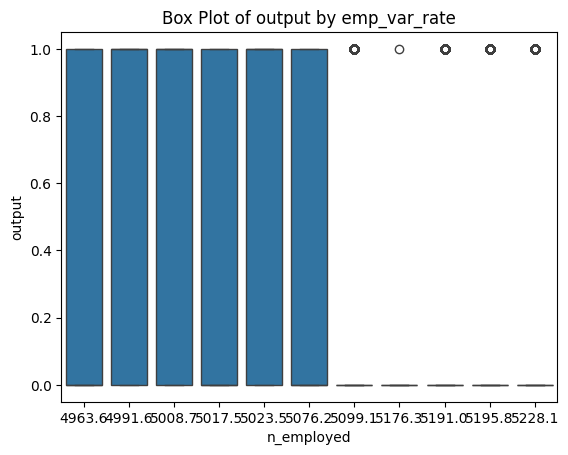

In [ ]:
# Box plot with scatter plot
sns.boxplot(y="output", x="n_employed", data=df)
plt.title("Box Plot of output by emp_var_rate")
plt.show()

Este gr√°fico evidencia una relaci√≥n inversa entre el nivel de empleo y la efectividad de la campa√±a: cuando hay menos empleados en el mercado (posiblemente reflejando una crisis o contexto dif√≠cil), los clientes est√°n m√°s dispuestos a responder. En cambio, cuando la econom√≠a va bien y el empleo es alto, las campa√±as pierden efectividad.

Esto hace de n_employed una variable predictiva altamente relevante, que puede utilizarse para segmentar temporalmente las campa√±as o enriquecer modelos de predicci√≥n de respuesta.



#### An√°lisis Categ√≥ricas VS Categ√≥ricas


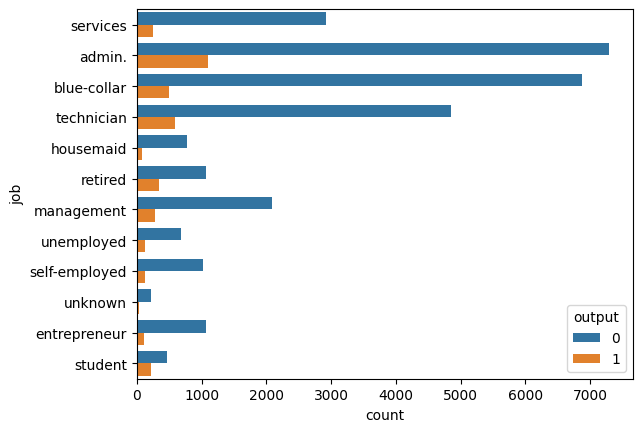

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="job", data=df)
plt.show()

Este gr√°fico es un countplot horizontal que muestra la distribuci√≥n del resultado de campa√±a (output) seg√∫n el tipo de ocupaci√≥n (job) del cliente. Es √∫til para identificar qu√© perfiles laborales tienden a responder m√°s o menos a las campa√±as.

**Las ocupaciones con mayor volumen de contactos son:** admin., blue-collar, technician y services, todas con m√°s de 3000 observaciones, pero con una proporci√≥n baja de respuestas positivas (output = 1). Especialmente, los sectores blue-collar y technician tienen muchas campa√±as pero baja efectividad.

**En contraste, categor√≠as como:** student, retired, admin., y management tienen una mayor proporci√≥n relativa de respuestas positivas, aunque en menor volumen absoluto. Por ejemplo, student y retired tienen barras peque√±as, pero con una presencia m√°s visible de output = 1.

Categor√≠as como unknown, entrepreneur y self-employed tienen baja presencia general y escasa respuesta positiva.

Podemos concluir que el tipo de ocupaci√≥n tiene un impacto directo en la efectividad de la campa√±a. Profesiones como admin. y student parecen responder mejor, mientras que los sectores de blue-collar o services, a pesar de ser altamente contactados, muestran muy bajas tasas de respuesta.

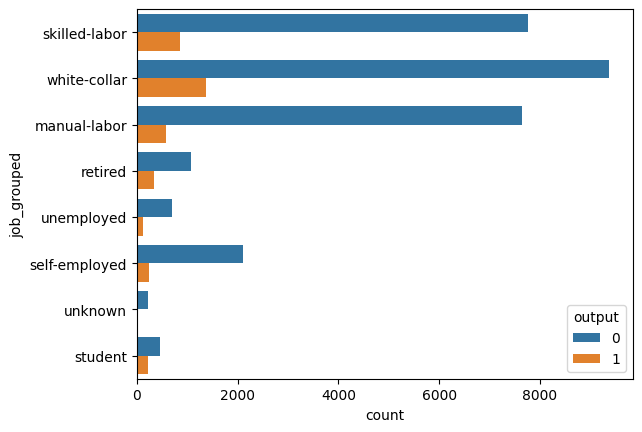

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="job_grouped", data=df)
plt.show()

Agrupar las ocupaciones en categor√≠as m√°s generales (job_grouped) permite observar que los perfiles white-collar y t√©cnicos calificados tienen mayores tasas absolutas de respuesta, lo cual podr√≠a reflejar mayor afinidad con las ofertas de campa√±a o mayor acceso/capacidad de decisi√≥n financiera.

Esta variable agrupada es √∫til para modelos predictivos, ya que reduce la cardinalidad de la variable original job sin perder informaci√≥n relevante, y permite segmentar con mayor claridad.



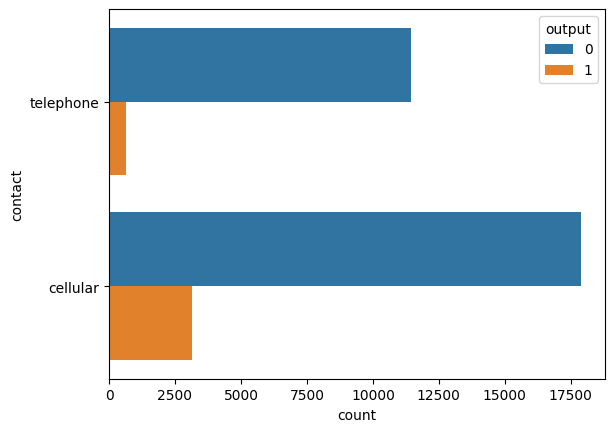

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="contact", data=df)
plt.show()

Este gr√°fico de barras apiladas muestra la relaci√≥n entre el tipo de contacto utilizado (contact) y la respuesta del cliente (output: 0 = no respondi√≥, 1 = respondi√≥) en una campa√±a de marketing.


- Los contactos se realizaron a trav√©s de dos canales: cellular y telephone.

- El canal cellular fue el m√°s utilizado, con casi 18,000 contactos, seguido por telephone, con unos 11,000.

- Lo m√°s destacable es que, aunque ambos canales tienen un alto n√∫mero de intentos, la mayor√≠a de las respuestas positivas (output = 1) provienen del canal cellular.

- Por el contrario, el contacto por telephone muestra una tasa de respuesta muy baja, con una gran mayor√≠a de output = 0.

‚úÖ Conclusi√≥n

El canal de contacto influye significativamente en la efectividad de la campa√±a. El uso del m√≥vil (cellular) genera muchas m√°s respuestas positivas, posiblemente porque permite mayor inmediatez, accesibilidad o cercan√≠a. En cambio, el tel√©fono fijo parece ser mucho menos efectivo.

Este hallazgo es clave para la estrategia: conviene priorizar el uso de canales m√≥viles en futuras campa√±as. Adem√°s, esta variable contact puede ser muy √∫til en modelos predictivos como factor categ√≥rico relevante.



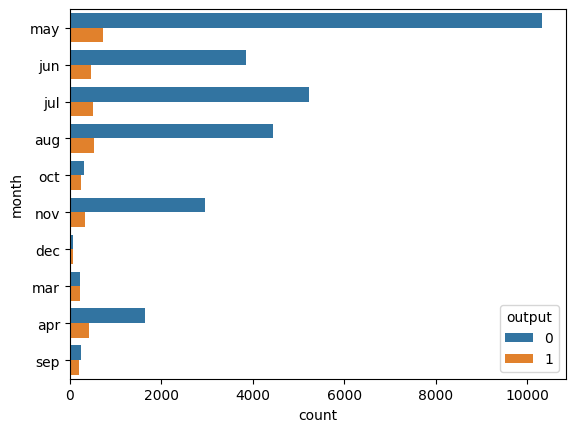

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="month", data=df)
plt.show()

Este gr√°fico de barras apiladas muestra la cantidad de contactos realizados por mes (month) junto con el resultado de la campa√±a (output: 0 = no respondi√≥, 1 = respondi√≥). Es √∫til para identificar patrones temporales en la efectividad de la campa√±a.



- Mayo (may) es el mes con mayor volumen de contactos, superando ampliamente al resto. Sin embargo, la mayor√≠a de ellos no generaron respuesta positiva (output = 0), lo que sugiere que el alto volumen no se tradujo en efectividad.

- Meses como julio (jul), agosto (aug), y junio (jun) tambi√©n presentan altos vol√∫menes, pero con proporciones de respuesta ligeramente mejores en comparaci√≥n con mayo.

- Abril (apr) y noviembre (nov) muestran un n√∫mero moderado de contactos, pero con una relaci√≥n m√°s equilibrada entre respuestas positivas y negativas.

- Meses como octubre, marzo, diciembre y septiembre tienen muy pocos contactos en general, lo que podr√≠a deberse a menor actividad de campa√±a.



El mes de contacto influye tanto en el volumen como en la efectividad de la campa√±a. Aunque mayo concentra la mayor parte de los esfuerzos, no es necesariamente el m√°s exitoso en t√©rminos de conversi√≥n. Meses con menor volumen como abril o noviembre podr√≠an tener mejores tasas de conversi√≥n relativas.

Esta variable (month) es relevante para an√°lisis de estacionalidad o para optimizar el calendario de campa√±as, y puede mejorar el rendimiento de modelos si se transforma en una variable categ√≥rica o se usa para extraer patrones temporales.



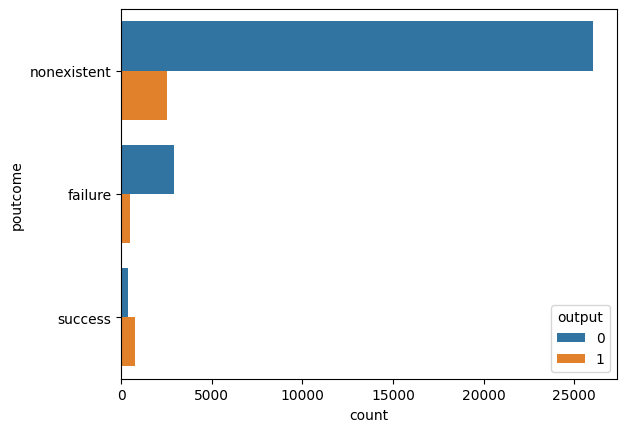

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="poutcome", data=df)
plt.show()

Este gr√°fico de barras apiladas muestra el impacto del resultado de campa√±as anteriores (poutcome) en la respuesta a la campa√±a actual (output: 0 = no respondi√≥, 1 = respondi√≥). Las categor√≠as de poutcome son:

- nonexistent: el cliente no fue contactado en campa√±as anteriores.

- failure: fue contactado anteriormente, pero no se logr√≥ una conversi√≥n.

- success: fue contactado anteriormente y respondi√≥ positivamente.

üìä An√°lisis del Countplot: output vs poutcome
- La mayor√≠a de los clientes tienen poutcome = nonexistent, es decir, no participaron en campa√±as anteriores. Aunque hay muchas respuestas negativas en este grupo, tambi√©n contiene la mayor cantidad de respuestas positivas absolutas, simplemente porque el volumen total es muy alto.

- El grupo failure muestra una alta proporci√≥n de respuestas negativas (output = 0) y muy pocas respuestas positivas, lo que sugiere que haber fallado en una campa√±a previa reduce la probabilidad de √©xito actual.

- En contraste, el grupo success, aunque peque√±o en volumen, muestra una proporci√≥n significativamente mayor de respuestas positivas, lo que indica que un cliente que respondi√≥ positivamente en el pasado tiene m√°s probabilidad de hacerlo de nuevo.

El resultado de campa√±as anteriores es un predictor importante del comportamiento futuro. Mientras que los clientes nuevos o sin historial (nonexistent) pueden responder en funci√≥n de otros factores, quienes tuvieron una experiencia exitosa previa (success) son m√°s propensos a volver a responder positivamente.

La variable poutcome es valiosa y deber√≠a incluirse como variable categ√≥rica en cualquier modelo de predicci√≥n. Tambi√©n puede ser √∫til para segmentar campa√±as: por ejemplo, priorizar a clientes que ya respondieron bien antes.



## Feature Engineering
Apply here all the transformations you consider necessary for training a model.

In [ ]:
train_transformed = train_df[['age','campaing','pdays',
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index', 'euribor_3m', 'n_employed',
                              'output']]

In [ ]:
train_transformed.head()

age  campaing  pdays  previous  emp_var_rate  cons_price_index  \
0   57         1    999         0           1.1            93.994   
1   37         1    999         0           1.1            93.994   
2   40         1    999         0           1.1            93.994   
3   45         1    999         0           1.1            93.994   
4   59         1    999         0           1.1            93.994   

   cons_conf_index  euribor_3m  n_employed  output  
0            -36.4       4.857      5191.0       0  
1            -36.4       4.857      5191.0       0  
2            -36.4       4.857      5191.0       0  
3            -36.4       4.857      5191.0       0  
4            -36.4       4.857      5191.0       0

In [ ]:
# 1. Imports b√°sicos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [ ]:
# 2. Funciones auxiliares

# 1) Winsorizer para capping
from sklearn.base import BaseEstimator, TransformerMixin
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.01, upper_quantile=0.99):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
    def fit(self, X, y=None):
        self.lower_ = np.quantile(X, self.lower_quantile, axis=0)
        self.upper_ = np.quantile(X, self.upper_quantile, axis=0)
        return self
    def transform(self, X):
        return np.clip(X, self.lower_, self.upper_)


In [ ]:
# 2) Funci√≥n para discretizar (add_bins)
def add_bins(df, age_edges, euribor_edges, emp_var_edges, n_employed_edges):
    df = df.copy()
    df['age_bin']       = pd.cut(df['age'], bins=age_edges,
                                 labels=['Joven','Adulto','Senior','Mayor'])
    df['pdays_bin']     = np.where(df['pdays']==999, 'no_contact', 'recent_contact')
    df['euribor_bin']   = pd.cut(df['euribor_3m'], bins=euribor_edges,
                                 labels=['bajo','medio','alto'], include_lowest=True)
    df['emp_var_bin']   = pd.cut(df['emp_var_rate'], bins=emp_var_edges,
                                 labels=['desempleo_alto','estabilidad'], include_lowest=True)
    df['n_employed_bin']= pd.cut(df['n_employed'], bins=n_employed_edges,
                                 labels=['bajo','medio','alto'], include_lowest=True)
    return df


In [ ]:
#3. Definici√≥n de bins y Discretizaci√≥n
# 1) Definimos los cortes basados en train
age_edges     = [0,25,40,60, train_df['age'].max()]
euribor_edges = [0,1.5,3,5]
emp_var_edges = [-3.5,0,1.5]
max_emp       = train_df['n_employed'].max()
n_employed_edges = sorted({4800,5000,5200,max_emp})


In [ ]:
# 2) APLICAMOS DISCRETIZACIONES
train_transformed = add_bins(train_df, age_edges, euribor_edges, emp_var_edges, n_employed_edges)


In [ ]:
#4. Listas de features
# Num√©ricas ‚Äúnaturales‚Äù
num_feats = [
    'age','campaing','pdays','previous',
    'emp_var_rate','cons_price_index','cons_conf_index',
    'euribor_3m','n_employed'
]
# categ√≥ricas created por bins
cat_feats = ['age_bin','pdays_bin','euribor_bin','emp_var_bin','n_employed_bin']
target    = 'output'

## 3.- Data Model

In [ ]:
#5. Split Train/Validation antes de cualquier preprocesado
# SEPARAMOS FEATURES / TARGET
X = train_transformed[num_feats + cat_feats]
y = train_transformed[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=2022
)

In [ ]:
#6. Definici√≥n del Pipeline completo
# 1) Sub‚Äëpipeline num√©rico
num_pipeline = Pipeline([
    ('winsor', Winsorizer(0.01,0.99)),
    ('scale',  StandardScaler())
])
cat_pipeline = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('nums', num_pipeline, num_feats),
    ('cats', cat_pipeline, cat_feats)
])

pipeline = ImbPipeline([
    ('pre',   preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf',   RandomForestClassifier(random_state=1234, class_weight='balanced'))
])



### 3.1.- Training a Logistic Regression Model

In [ ]:
# 4. Funci√≥n de evaluaci√≥n con tu compute_metrics
def compute_metrics(model, X_train, y_train, X_test, y_test, trh=0.5):
    y_pr_tr = model.predict_proba(X_train)[:,1]
    y_pr_te = model.predict_proba(X_test )[:,1]
    y_pred  = (y_pr_te >= trh).astype(int)
    fpr_tr, tpr_tr, _ = metrics.roc_curve(y_train, y_pr_tr)
    fpr_te, tpr_te, _ = metrics.roc_curve(y_test,  y_pr_te)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    spec = tn/(tn+fp)
    import matplotlib.pyplot as plt
    plt.plot(fpr_tr, tpr_tr, '-r', label='train')
    plt.plot(fpr_te, tpr_te, '-b', label='test')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.legend(); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.show()
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    print("AUC test: ", metrics.auc(fpr_te, tpr_te))
    print("AUC trn:  ", metrics.auc(fpr_tr, tpr_tr))
    print("Recall:   ", metrics.recall_score(y_test, y_pred))
    print("Spec:     ", spec)
    print("F1:       ", metrics.f1_score(y_test, y_pred))

In [ ]:
#7. B√∫squeda de hiperpar√°metros (Grid Search)
param_grid = {
    'clf__n_estimators':      [100,200],
    'clf__max_depth':         [6,8,10],
    'clf__min_samples_split': [2,5]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Mejores params:", grid.best_params_)
print("Mejor AUC CV:",  grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores params: {'clf__max_depth': 6, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Mejor AUC CV: 0.7904834473644552


In [ ]:
#8. Selecci√≥n de umbral √≥ptimo sobre validaci√≥n
probs_val = best_model.predict_proba(X_val)[:,1]
ths       = np.linspace(0.1,0.9,17)
f1s       = [metrics.f1_score(y_val, probs_val>=t) for t in ths]
best_t    = ths[np.argmax(f1s)]
print("Umbral √≥ptimo F1:", best_t, "‚Üí F1=", max(f1s))

Umbral √≥ptimo F1: 0.6 ‚Üí F1= 0.5023041474654378


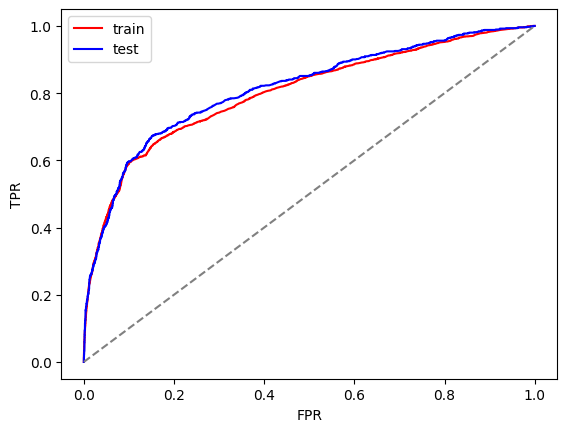

Accuracy:  0.8695258230141951
AUC test:  0.8133035358294973
AUC trn:   0.8017572551652383
Recall:    0.5797872340425532
Spec:      0.9066439522998296
F1:        0.5023041474654378


In [ ]:
#9. Evaluaci√≥n final en el split
compute_metrics(
    best_model,
    X_train, y_train,
    X_val,   y_val,
    trh=best_t
)

In [ ]:
#10. Reentrenamiento sobre TODO el train
# Refit con los mejores params y TODO el dataset
# Extraemos s√≥lo la parte apr√®s "clf__"
rf_params = {
    p.split('__')[1]: v
    for p,v in grid.best_params_.items()
    if p.startswith('clf__')
}


# Y construimos el pipeline final
pipeline_final = ImbPipeline([
    ('pre',   preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(
         random_state=1234,
         class_weight='balanced',
         **rf_params
    ))
])


# Reentrenamos sobre TODO el train
pipeline_final.fit(X, y)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'campaing', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'cons_price_index',
                                                   'cons_conf_index',
                                                   'euribor_3m',
                                                   'n_employed']),
                                                 ('cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['age_bin', 'pdays_bin',
                                                   'euribor_bin', 'emp_var_bin',
                                                   'n_employed_bin'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=6,
                                        n_estimators=200, random_state=1234))])

In [ ]:
X_train.shape

(26486, 14)

In [ ]:
train_quantiles = {}
for c in num_feats:
    train_quantiles[c] = {
        'lower': train_transformed[c].quantile(0.01),
        'upper': train_transformed[c].quantile(0.99)
    }


## Kaggle Submission

In [ ]:
## Kaggle Competition
#---> https://www.kaggle.com/t/7263970cc095d70a089870a0c4842129



In [ ]:
# Descarga el dataset de test para hacer la predicci√≥n:
import pandas as pd

if Local == True:
    !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
    valid_df = pd.read_csv('test.csv')
else:
    valid_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

Downloading...
From: https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
To: /content/test.csv
100% 954k/954k [00:00<00:00, 72.7MB/s]


In [ ]:
valid_df.head()

id  age          job marital_status education_level is_default  \
0   0   56    housemaid        married        basic.4y         no   
1   4   56     services        married     high.school         no   
2  10   41  blue-collar        married         unknown    unknown   
3  14   35  blue-collar        married        basic.6y         no   
4  21   55  blue-collar        married        basic.4y    unknown   

  housing_type loan    contact month day_of_week  campaing  pdays  previous  \
0           no   no  telephone   may         mon         1    999         0   
1           no  yes  telephone   may         mon         1    999         0   
2           no   no  telephone   may         mon         1    999         0   
3          yes   no  telephone   may         mon         1    999         0   
4          yes   no  telephone   may         mon         1    999         0   

      poutcome  emp_var_rate  cons_price_index  cons_conf_index  euribor_3m  \
0  nonexistent           1.1            93.994            -36.4       4.857   
1  nonexistent           1.1            93.994            -36.4       4.857   
2  nonexistent           1.1            93.994            -36.4       4.857   
3  nonexistent           1.1            93.994            -36.4       4.857   
4  nonexistent           1.1            93.994            -36.4       4.857   

   n_employed  
0      5191.0  
1      5191.0  
2      5191.0  
3      5191.0  
4      5191.0

#### Feature Engineering a valid_df
Aplicar las transformaciones a valid_df (las mismas que realizaste para train_df)

In [ ]:
valid_transformed = valid_df[['age','campaing','pdays',
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index', 'euribor_3m', 'n_employed']]


In [ ]:
# 8.1 Extrae el preprocesador y el clasificador entrenado
pre = pipeline_final.named_steps['pre']
clf = pipeline_final.named_steps['clf']

# 8.2 Reconstruye la lista de columnas finales (num + dummies)
num_out = num_feats.copy()
ohe     = pre.named_transformers_['cats']
cat_out = ohe.get_feature_names_out(cat_feats).tolist()
final_cols = num_out + cat_out

# 8.3 Inyecta feature_names_in_ en el clf para que eval_best_model lo reconozca
clf.feature_names_in_ = np.array(final_cols)

# 8.4 Lee el test raw y apl√≠cale add_bins exacto
#raw_test    = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")
test_binned = add_bins(valid_df, age_edges, euribor_edges, emp_var_edges, n_employed_edges)

# 8.5 Selecciona las columnas crudas y aplica ColumnTransformer
X_raw_test = test_binned[num_feats + cat_feats]
arr_test   = pre.transform(X_raw_test)

# 8.6 Construye valid_transformed con los nombres correctos
valid_transformed = pd.DataFrame(arr_test, columns=final_cols)


In [ ]:
#valid_transformed = add_bins( valid_transformed, age_edges, euribor_edges, emp_var_edges, n_employed_edges)

In [ ]:
#################################
#Funci√≥n auxiliar (NO MODIFICAR):
#################################

def eval_best_model(final_model, valid_df):

    if Local == True:
      !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
      Id_aux = pd.read_csv('test.csv')
    else:
      Id_aux = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

    columns = final_model.feature_names_in_
    X_valid = valid_df[columns]
    y_valid_pred = final_model.predict_proba(X_valid)[:,1]

    submission = pd.DataFrame({'id': Id_aux['id'],
                               'output': y_valid_pred})
    return (submission)

In [ ]:
submission = eval_best_model(clf, valid_transformed)

Downloading...
From: https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
To: /content/test.csv
100% 954k/954k [00:00<00:00, 131MB/s]


In [ ]:
submission.to_csv('./submission.csv', index = False)